### Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# Business Problem

### Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries




# Loading the Libraries

In [3]:
%pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Understanding the DATA

In [5]:
Netflix = pd.read_csv("netflix.csv")

In [6]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


In [8]:
Netflix.shape

(8807, 12)

In [9]:
Netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
Netflix.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### Finding out the percentage of missing values in each column

In [11]:
missing_percentage = (Netflix.isna().mean() * 100).round(2)
missing_percentage

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

## Observations

### 1) We have 12 no. of columns and 8807 no. of rows.

### 2) Most of the data is in categorical form, out of 12 columns, 11 have 'object' datatype and 1 is 'int64'

### 3) 'Director' column has very high missing values (Almost 30%)

# Handling Missing Values

We are going to delete the rows with missing values in other columns except 'Director'

In [12]:
Netflix = Netflix.dropna(subset=['title', 'date_added', 'release_year', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description'])
missing_percentage = (Netflix.isna().mean() * 100).round(2)
missing_percentage

show_id          0.00
type             0.00
title            0.00
director        26.86
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [13]:
Netflix['type'].value_counts(normalize=True)*100

Movie      72.386831
TV Show    27.613169
Name: type, dtype: float64

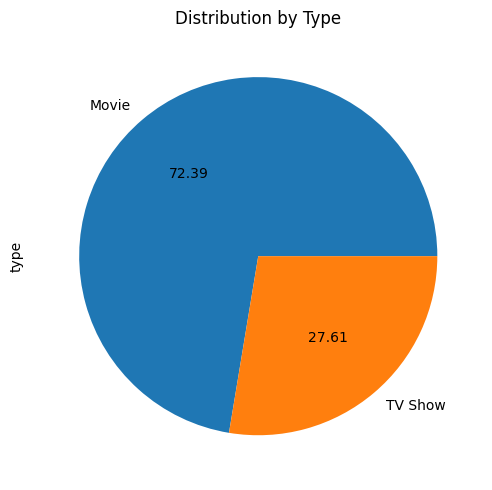

In [14]:
plt.figure(figsize=(12, 5))
Netflix['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.title('Distribution by Type')
plt.tight_layout()
plt.show()

In [15]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## Unnesting Data

In [16]:
Netflix_unnest = Netflix.copy()
Netflix_unnest = Netflix_unnest.reset_index(drop = True)

### Exploding 'Cast' Column

In [17]:
Netflix_unnest['cast'] = Netflix_unnest['cast'].apply(lambda x: str(x).split(', '))

In [18]:
Netflix_unnest = Netflix_unnest.explode('cast')

### Exploding 'Director' Column

In [19]:
Netflix_unnest['director'] = Netflix_unnest['director'].apply(lambda x : str(x).split(', '))

In [20]:
Netflix_unnest = Netflix_unnest.explode('director')
Netflix_unnest.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
0,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
0,s2,TV Show,Blood & Water,nan,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
0,s2,TV Show,Blood & Water,nan,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
0,s2,TV Show,Blood & Water,nan,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Exploding 'Country' Column

In [21]:
Netflix_unnest['country'] = Netflix_unnest['country'].apply(lambda x: str(x).split(', '))

In [22]:
Netflix_unnest['country'] = Netflix_unnest['country'].apply(lambda x: [item.strip() for item in x])

In [23]:
Netflix_unnest = Netflix_unnest.explode('country')

### Exploding 'Listed_in' Column

In [24]:
Netflix_unnest['listed_in'] = Netflix_unnest['listed_in'].apply(lambda x: str(x).split(', '))

In [25]:
Netflix_unnest = Netflix_unnest.explode('listed_in')

In [26]:
Netflix_unnest.shape

(188039, 12)

### Convert 'Date' column from str to datetime format

In [27]:
Netflix_unnest['date_added']= pd.to_datetime(Netflix_unnest['date_added'])

### Checking for inconsistency in 'Duration' and 'Rating' column

In [28]:
Netflix_unnest['duration'].value_counts()

1 Season     29587
2 Seasons     8863
3 Seasons     4880
94 min        4248
106 min       3896
             ...  
196 min          4
18 min           4
20 min           3
17 min           2
8 min            2
Name: duration, Length: 206, dtype: int64

In [29]:
Netflix_unnest['rating'].value_counts()

TV-MA       68489
TV-14       39458
R           25638
PG-13       16078
TV-PG       13487
PG          10802
TV-Y7        5195
TV-Y         3126
TV-G         2448
G            1528
NR           1475
NC-17         149
UR             86
TV-Y7-FV       80
Name: rating, dtype: int64

### We will seperate datasets as Directors with missing values and directors without missing values then we will try to replace missing values with best possible directors and finally we will merge these two datasets

### 1) When we exploded 'Directors' column we replaced missing values with 'nan'.
### Now we are replaceing it with pd.NA so that we can work on that

In [30]:
Netflix_unnest['director'].replace('nan', pd.NA, inplace=True)

### 2) Here we are seperating dataset for directors withouth missing values

In [31]:
NetFlix_withoutNaDirector = Netflix_unnest.dropna(subset=['director'])

### 3) To find the most suitable director for missing values we will group by the dataset without directors without missing values by the columns 'country' and 'type' and we will teke 'mode' of 'Directors' column

In [32]:
most_common_director_df = NetFlix_withoutNaDirector.groupby(['country', 'type'])['director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA).reset_index()
most_common_director_df = most_common_director_df.reset_index(drop=True)
most_common_director_df.columns = ['country', 'type', 'mode_director']

### 4) Here we are seperating dataset for direcotrs with missing values


In [33]:
Na_Director = Netflix_unnest[Netflix_unnest['director'].isna()]
Na_Director = Na_Director.reset_index(drop=True)

### 5) To replace missing values by the most suitable values, we will merge the group by dataset and dataset with directors missing values. This will give us a dataset with 'Director_mode' column with most suitable value

In [34]:
merged_df = Na_Director.merge(most_common_director_df, on=['country', 'type'], how='left')

### 6) Now we will replace the missing values from Na_Director dataset by the values from 'mode_director' column in the merged dataset

In [35]:
Na_Director['director'].fillna(merged_df['mode_director'], inplace=True)

In [36]:
missing_percentage = (Na_Director.isna().mean() * 100).round(2)
missing_percentage

show_id         0.00
type            0.00
title           0.00
director        5.12
cast            0.00
country         0.00
date_added      0.00
release_year    0.00
rating          0.00
duration        0.00
listed_in       0.00
description     0.00
dtype: float64

### 7) There are still some missing values in director. Now we will drop the rows with missing values

In [37]:
Na_Director.dropna(subset=['director'], inplace=True)

### 8) Now we will concat the datasets without director missing values and replaced na values

In [38]:
netflix_new = pd.concat([NetFlix_withoutNaDirector, Na_Director])

In [39]:
netflix_new = netflix_new.reset_index(drop=True)

In [40]:
netflix_new.shape

(185736, 12)

# Graphical and Non Graphical Analysis

## Lets analyze the overall data

In [41]:
netflix_new.groupby(['rating', 'type'])['show_id'].nunique().sort_values(ascending=False)

rating    type   
TV-MA     Movie      1776
TV-14     Movie      1191
TV-MA     TV Show     848
R         Movie       778
TV-14     TV Show     543
PG-13     Movie       470
TV-PG     Movie       430
PG        Movie       275
TV-PG     TV Show     222
TV-Y7     TV Show     141
TV-Y      TV Show     127
TV-G      Movie        90
TV-Y7     Movie        80
TV-Y      Movie        80
TV-G      TV Show      68
NR        Movie        58
G         Movie        40
NR        TV Show       4
NC-17     Movie         3
TV-Y7-FV  Movie         3
UR        Movie         3
TV-Y7-FV  TV Show       1
Name: show_id, dtype: int64

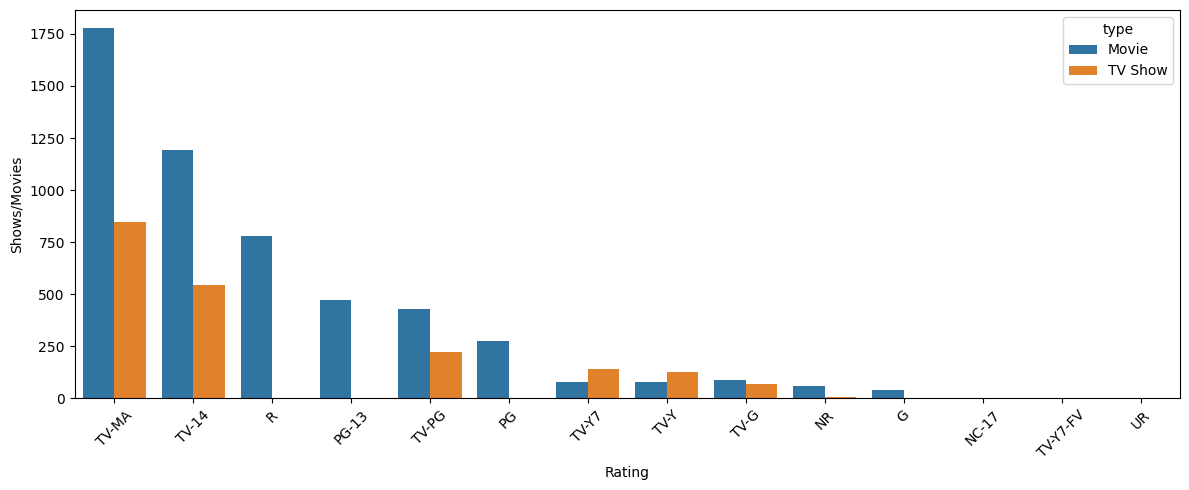

In [42]:
# type wise Unique counts for rating

rating = netflix_new.groupby(['rating', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='rating', y='show_id', hue='type', data=rating)
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Shows/Movies')
plt.tight_layout()
plt.show()

Most of the shows & *movies* are 'TV-MA' Rated

In [43]:
netflix_new.groupby(['release_year', 'type'])['show_id'].nunique().sort_values(ascending=False).nlargest(10)

release_year  type   
2018          Movie      653
2017          Movie      649
2016          Movie      574
2019          Movie      513
2020          Movie      417
2015          Movie      344
2020          TV Show    317
2019          TV Show    296
2018          TV Show    271
2014          Movie      237
Name: show_id, dtype: int64

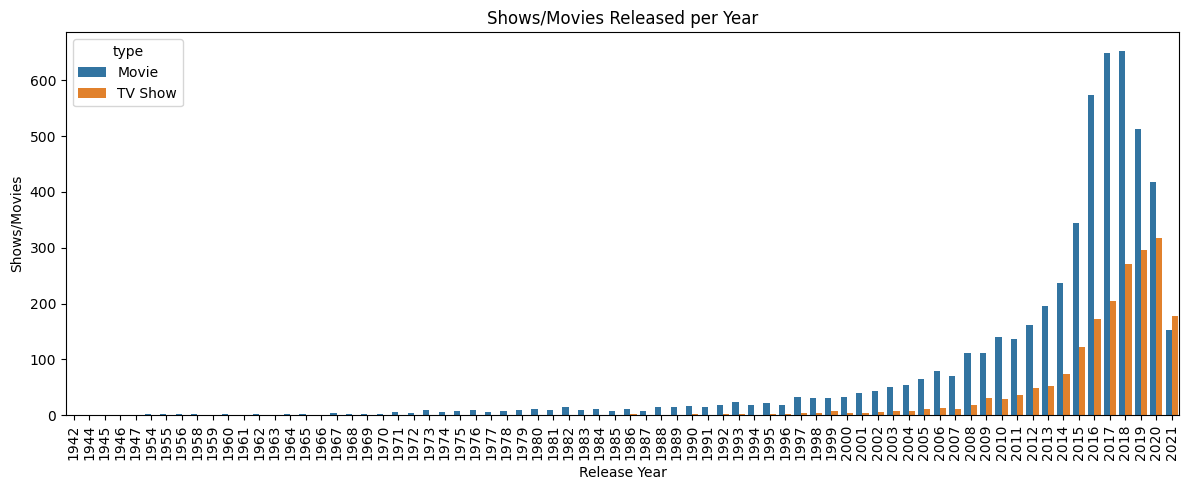

In [44]:
# type wise unique counts for each year

year = netflix_new.groupby(['release_year', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='release_year', y='show_id', hue='type', data=year)
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Shows/Movies')
plt.title('Shows/Movies Released per Year')
plt.tight_layout()
plt.show()

The data is available from 1942 to 2021

Most Shows are released in 2020 & Most Movies are released in 2018.

Till 2018 the trend of movies is increasing then it is decreasing but the trend of TV shows is increasing.

In 2021 More TV Shows are released compared to Movies

In [45]:
# total no. of movies/shows released in each country

netflix_new.groupby(['country'])['show_id'].nunique().sort_values(ascending=False).nlargest(10)

country
United States     3274
India             1007
United Kingdom     707
Canada             414
France             361
Japan              307
South Korea        227
Spain              209
Germany            207
China              156
Name: show_id, dtype: int64

<ipython-input-46-d379adf74a23>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot =sns.barplot(x='Country', y='count', data=top_10_df, palette='viridis')


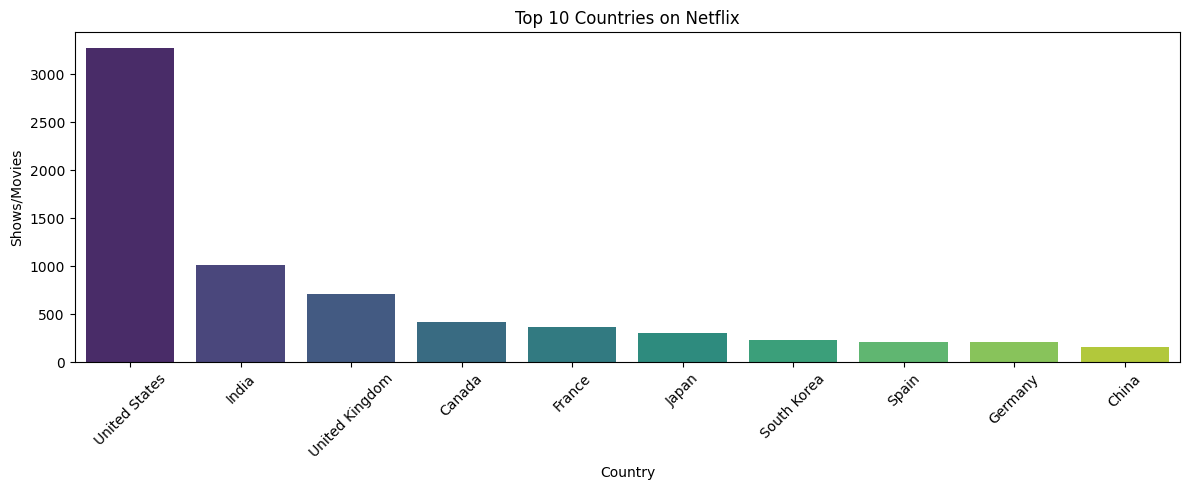

In [46]:
# top 10 countries with highest no. of movies/shows

top_10_countries = netflix_new.groupby(['country'])['show_id'].nunique().sort_values(ascending=False).nlargest(10)

top_10_df = pd.DataFrame({'Country': top_10_countries.index, 'count': top_10_countries})


plt.figure(figsize=(12, 5))
plot =sns.barplot(x='Country', y='count', data=top_10_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Shows/Movies')
plt.title('Top 10 Countries on Netflix')

plt.tight_layout()
plt.show()

Maximum movies/shows are relesed in United Stated followed by India

In [47]:
netflix_new['duration'] = netflix_new['duration'].apply(lambda x: str(x).split(' ')[0])
netflix_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s..."


In [48]:
netflix_new.groupby(['duration', 'type'])['show_id'].nunique().sort_values(ascending=False)

duration  type   
1         TV Show    1203
2         TV Show     343
3         TV Show     164
94        Movie       136
97        Movie       130
                     ... 
214       Movie         1
208       Movie         1
205       Movie         1
203       Movie         1
193       Movie         1
Name: show_id, Length: 206, dtype: int64

<ipython-input-49-1360a5e60e03>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='duration', data=duration, palette='pastel')


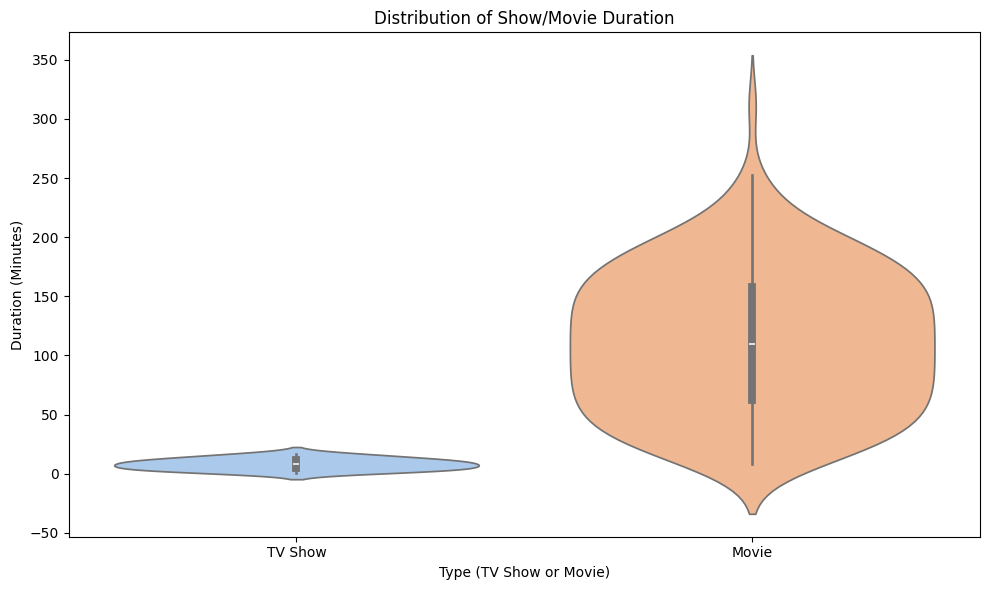

In [49]:
#type wise unique counts for duration of show

duration = netflix_new.groupby(['duration', 'type'])['show_id'].nunique().reset_index()

duration['duration'] = pd.to_numeric(duration['duration'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='duration', data=duration, palette='pastel')
plt.xlabel('Type (TV Show or Movie)')
plt.ylabel('Duration (Minutes)')
plt.title('Distribution of Show/Movie Duration')
plt.tight_layout()
plt.show()

Most TV shows run for 1 season

Most Movies are of 94 mins (around 1hr34min)


In [50]:
netflix_new.groupby(['listed_in', 'type'])['show_id'].nunique().sort_values(ascending=False)

listed_in                     type   
International Movies          Movie      2392
Dramas                        Movie      2309
Comedies                      Movie      1574
International TV Shows        TV Show     991
Action & Adventure            Movie       811
Independent Movies            Movie       742
TV Dramas                     TV Show     612
Romantic Movies               Movie       583
Thrillers                     Movie       549
Children & Family Movies      Movie       521
TV Comedies                   TV Show     464
Documentaries                 Movie       410
Crime TV Shows                TV Show     344
Kids' TV                      TV Show     339
Horror Movies                 Movie       338
Stand-Up Comedy               Movie       310
Music & Musicals              Movie       299
Romantic TV Shows             TV Show     285
Sci-Fi & Fantasy              Movie       239
British TV Shows              TV Show     200
Docuseries                    TV Show     

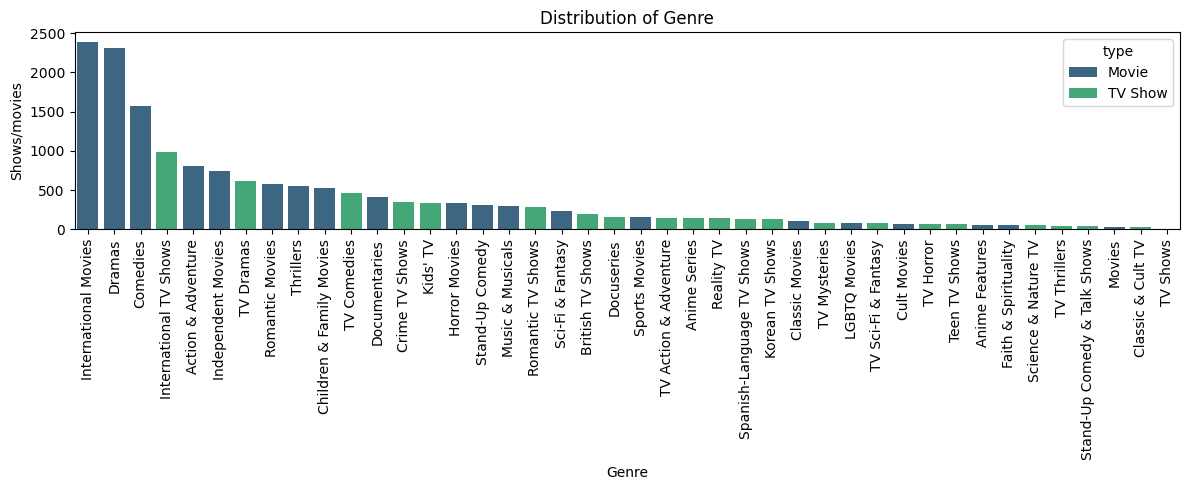

In [51]:
# type wise unique counts for genre of show

genre = netflix_new.groupby(['listed_in', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plot =sns.barplot(x='listed_in', y='show_id', hue='type', data=genre, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Shows/movies')
plt.title("Distribution of Genre")
plt.tight_layout()
plt.show()

Maximum Movies are of 'International Movies' Genre

Maximum TV shows are of 'International TV Shows' Genre

In [52]:
netflix_new.groupby(['country', 'type'])['show_id'].nunique().sort_values(ascending=False)

country         type   
United States   Movie      2492
India           Movie       942
United States   TV Show     782
United Kingdom  Movie       475
Canada          Movie       295
                           ... 
Panama          Movie         1
Paraguay        Movie         1
Poland,         Movie         1
Senegal         Movie         1
Zimbabwe        Movie         1
Name: show_id, Length: 147, dtype: int64

In [53]:
# Extract day, month, and year into separate columns
netflix_new['day_added'] = netflix_new['date_added'].dt.day
netflix_new['month_added'] = netflix_new['date_added'].dt.month
netflix_new['year_added'] = netflix_new['date_added'].dt.year

In [54]:
netflix_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",24,9,2021
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",24,9,2021
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,International Movies,"On a photo shoot in Ghana, an American model s...",24,9,2021
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",24,9,2021
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",24,9,2021


In [55]:
netflix_new['Year_difference'] = netflix_new['year_added'] - netflix_new['release_year']
netflix_new['Year_difference'].head()

0    28
1    28
2    28
3    28
4    28
Name: Year_difference, dtype: int64

In [56]:
netflix_new['Year_difference'].value_counts()

0     55768
1     30938
2     14034
3     11941
4      8025
      ...  
73       20
72        8
70        8
75        4
71        2
Name: Year_difference, Length: 72, dtype: int64

In [57]:
netflix_new.groupby(['Year_difference', 'type'])['show_id'].nunique().sort_values(ascending=False)

Year_difference  type   
 0               Movie      1468
                 TV Show     977
 1               Movie       977
 2               Movie       425
 3               Movie       309
                            ... 
 29              TV Show       1
 26              TV Show       1
-2               TV Show       1
 23              TV Show       1
 75              Movie         1
Name: show_id, Length: 113, dtype: int64

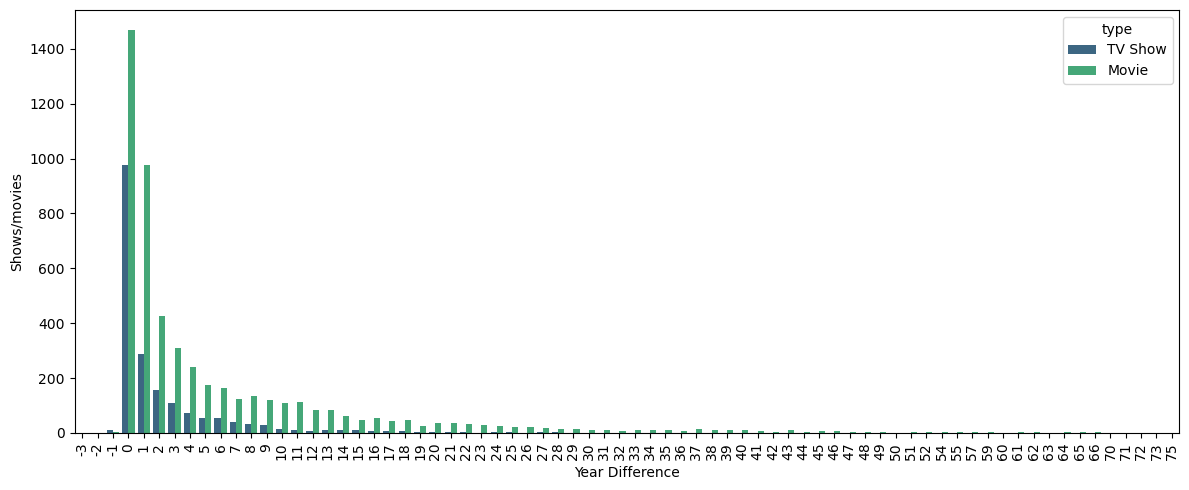

In [58]:
year_diff = netflix_new.groupby(['Year_difference', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plot =sns.barplot(x='Year_difference', y='show_id', hue='type', data=year_diff, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Year Difference')
plt.ylabel('Shows/movies')
plt.tight_layout()
plt.show()

Most shows/movies were added to Netflix on same year as they are released.

Few movies were added to netflix before release

In [59]:
netflix_new.groupby(['day_added', 'type'])['show_id'].nunique().sort_values(ascending=False)

day_added  type   
1          Movie      1526
           TV Show     394
15         Movie       394
2          Movie       210
16         Movie       189
                      ... 
7          TV Show      39
25         TV Show      38
9          TV Show      38
11         TV Show      32
29         TV Show      29
Name: show_id, Length: 62, dtype: int64

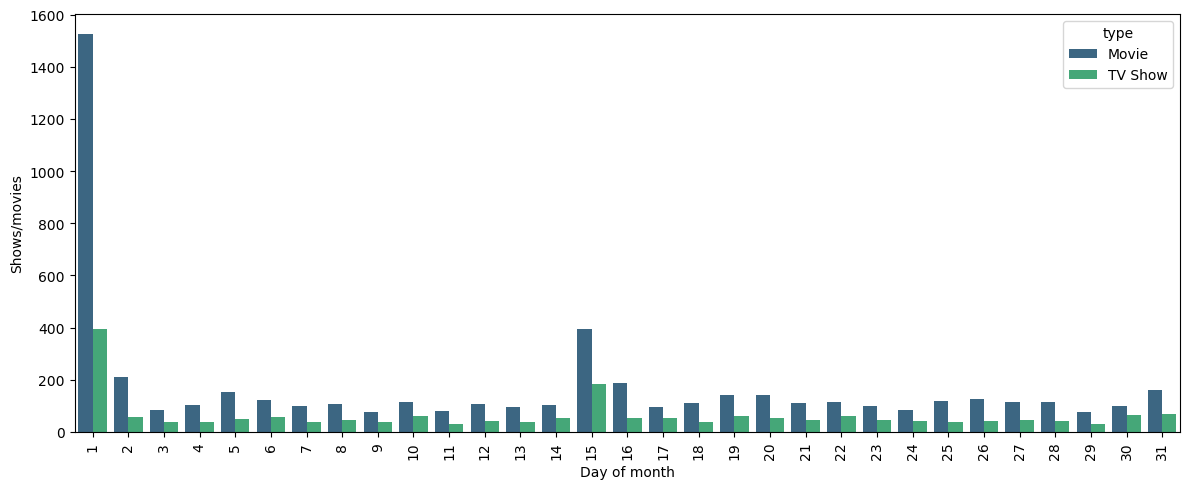

In [60]:
day = netflix_new.groupby(['day_added', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plot =sns.barplot(x='day_added', y='show_id', hue='type', data=day, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Day of month')
plt.ylabel('Shows/movies')
plt.tight_layout()
plt.show()

Maximum Movies/shows are added to netflix on 1st day of month

In [61]:
netflix_new.groupby(['month_added', 'type'])['show_id'].nunique().sort_values(ascending=False)

month_added  type   
1            Movie      494
12           Movie      487
10           Movie      483
4            Movie      469
11           Movie      460
3            Movie      460
7            Movie      456
8            Movie      438
9            Movie      424
6            Movie      409
5            Movie      360
2            Movie      337
12           TV Show    209
7            TV Show    184
9            TV Show    170
8            TV Show    165
11           TV Show    164
6            TV Show    163
10           TV Show    163
1            TV Show    154
4            TV Show    153
3            TV Show    148
2            TV Show    143
5            TV Show    138
Name: show_id, dtype: int64

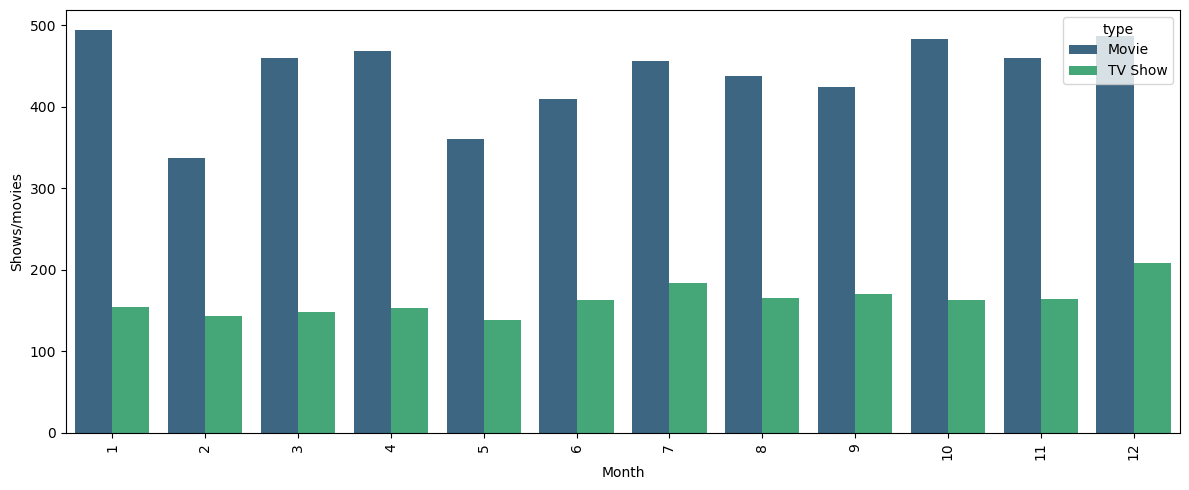

In [62]:
month = netflix_new.groupby(['month_added', 'type'])['show_id'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
plot =sns.barplot(x='month_added', y='show_id', hue='type', data=month, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Shows/movies')
plt.tight_layout()
plt.show()

Most of the movies are added on netflix in December

Most of the TV Shows are added on netflix in January

In [63]:
netflix_new.groupby(['type'])['show_id'].nunique()

type
Movie      5277
TV Show    1954
Name: show_id, dtype: int64

## Lets analyze the data for TV Shows & Movies seperately

In [64]:
netflix_tv = netflix_new[netflix_new['type'] == 'TV Show']
netflix_tv = netflix_tv.reset_index(drop = True)
netflix_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,Year_difference
0,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,2021-09-24,2021,TV-14,9,British TV Shows,A talented batch of amateur bakers face off in...,24,9,2021,0
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,2021-09-24,2021,TV-14,9,Reality TV,A talented batch of amateur bakers face off in...,24,9,2021,0
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,2021-09-24,2021,TV-14,9,British TV Shows,A talented batch of amateur bakers face off in...,24,9,2021,0
3,s9,TV Show,The Great British Baking Show,Andy Devonshire,Sue Perkins,United Kingdom,2021-09-24,2021,TV-14,9,Reality TV,A talented batch of amateur bakers face off in...,24,9,2021,0
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mary Berry,United Kingdom,2021-09-24,2021,TV-14,9,British TV Shows,A talented batch of amateur bakers face off in...,24,9,2021,0


In [65]:
netflix_movie = netflix_new[netflix_new['type'] == 'Movie']
netflix_movie = netflix_movie.reset_index(drop = True)
netflix_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,Year_difference
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",24,9,2021,28
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",24,9,2021,28
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,International Movies,"On a photo shoot in Ghana, an American model s...",24,9,2021,28
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",24,9,2021,28
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,Independent Movies,"On a photo shoot in Ghana, an American model s...",24,9,2021,28


In [66]:
import pandas as pd
from scipy.stats import chi2_contingency


# Select the relevant columns
columns_to_analyze = ['Year_difference', 'rating']

# Create a subset of the DataFrame with these columns
subset_df = netflix_movie[columns_to_analyze]

# Create a contingency table
contingency_table = pd.crosstab(subset_df['Year_difference'], subset_df['rating'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the contingency table and chi-square test results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Contingency Table:
rating             G  NC-17   NR    PG  PG-13     R  TV-14  TV-G  TV-MA  \
Year_difference                                                           
-1                 0      0    0     0      0     0      0     0     41   
 0               129      0  181  1240   1737  2328   5041   564  14207   
 1               184     12  317  1084   1405  1736   4812   250  11955   
 2                 0      0   96   494    521  1830   2832   164   4011   
 3                12    137   61   885    597  3286   1717   169   1995   
...              ...    ...  ...   ...    ...   ...    ...   ...    ...   
 70                0      0    0     0      0     0      0     0      0   
 71                0      0    0     0      0     0      0     0      0   
 72                0      0    0     0      0     0      8     0      0   
 73                0      0    0     0      0     0     20     0      0   
 75                0      0    0     0      0     0      4     0      0   

ratin

### 10 Countries with Maximum Movies & TV Shows

In [67]:
netflix_tv.groupby(['country'])['show_id'].nunique().sort_values(ascending=False)

country
United States     782
United Kingdom    232
Japan             193
South Korea       168
Canada            119
France             76
Taiwan             70
India              65
Australia          58
Mexico             55
Spain              53
China              48
Germany            39
Colombia           31
Turkey             30
Brazil             27
Thailand           24
Singapore          23
Italy              23
Argentina          19
Ireland            14
Denmark            13
Russia             12
Belgium            11
South Africa       10
Nigeria             9
Israel              9
Poland              8
Malaysia            6
Pakistan            4
Saudi Arabia        4
Indonesia           4
Philippines         3
Greece              2
Name: show_id, dtype: int64

<ipython-input-68-6bdd60256463>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot =sns.barplot(x='Country', y='count', data=top_10_df, palette='viridis')


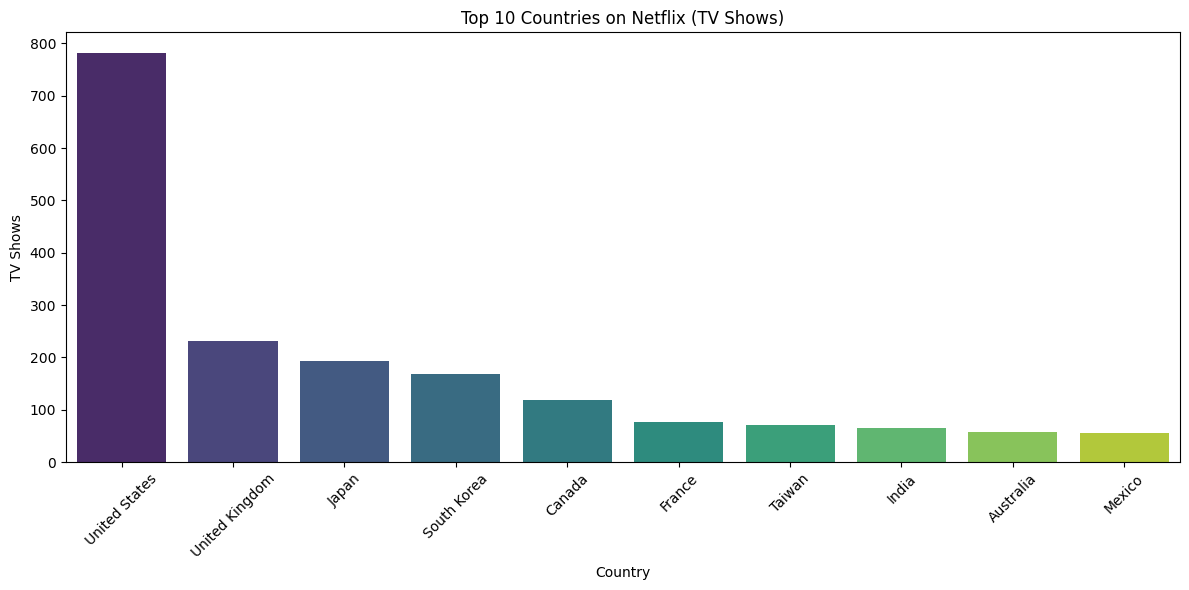

In [68]:
top_10_countries = netflix_tv.groupby(['country'])['show_id'].nunique().nlargest(10)

top_10_df = pd.DataFrame({'Country': top_10_countries.index, 'count': top_10_countries})

plt.figure(figsize=(12, 6))
plot =sns.barplot(x='Country', y='count', data=top_10_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('TV Shows')
plt.title('Top 10 Countries on Netflix (TV Shows)')

plt.tight_layout()
plt.show()

In [69]:
netflix_movie.groupby(['country'])['show_id'].nunique().sort_values(ascending=False)

country
United States     2492
India              942
United Kingdom     475
Canada             295
France             285
                  ... 
Mozambique           1
Namibia              1
Nicaragua            1
Panama               1
Zimbabwe             1
Name: show_id, Length: 113, dtype: int64

<ipython-input-70-ed284f67ae12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot =sns.barplot(x='Country', y='count', data=top_10_df, palette='viridis')


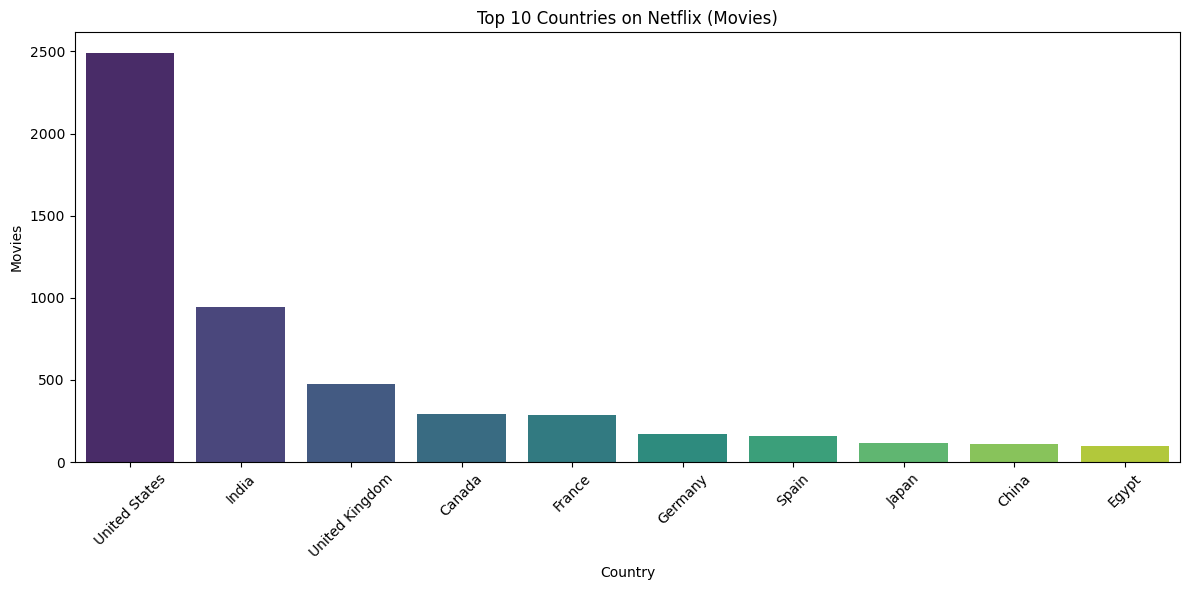

In [70]:
top_10_countries = netflix_movie.groupby(['country'])['show_id'].nunique().nlargest(10)

top_10_df = pd.DataFrame({'Country': top_10_countries.index, 'count': top_10_countries})

plt.figure(figsize=(12, 6))
plot =sns.barplot(x='Country', y='count', data=top_10_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Movies')
plt.title('Top 10 Countries on Netflix (Movies)')

plt.tight_layout()
plt.show()

# Best Time To launch a TV Show & Movie

In [71]:
netflix_tv.groupby(['month_added'])['show_id'].nunique().sort_values(ascending=False)

month_added
12    209
7     184
9     170
8     165
11    164
6     163
10    163
1     154
4     153
3     148
2     143
5     138
Name: show_id, dtype: int64

<ipython-input-72-b1efe7160eb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='count', data=month_df, palette='viridis', order=custom_order)


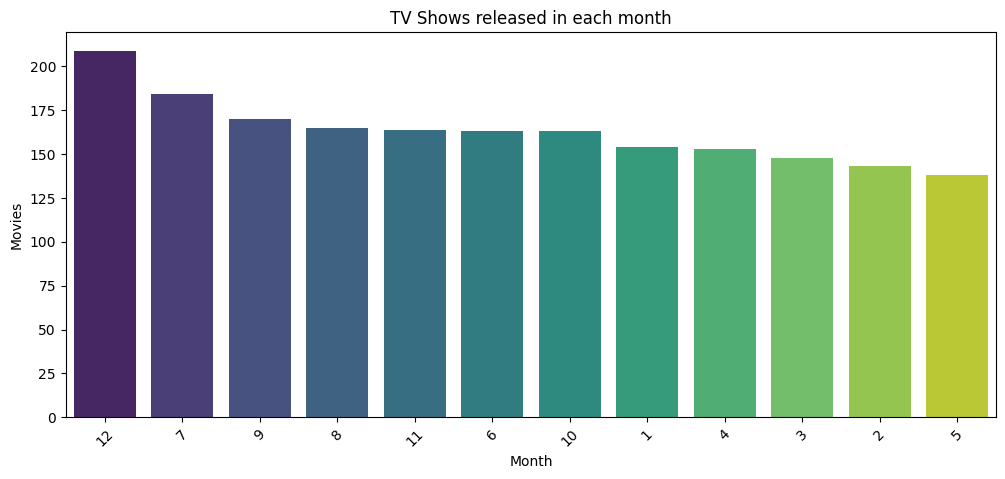

<Figure size 640x480 with 0 Axes>

In [72]:
month = netflix_tv.groupby(['month_added'])['show_id'].nunique()
month_df = pd.DataFrame({'Month': month.index, 'count': month})
month_df = month_df.sort_values(by='count', ascending=False)
custom_order = month_df['Month'].tolist()

plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='count', data=month_df, palette='viridis', order=custom_order)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Movies')
plt.title('TV Shows released in each month')
plt.show()
plt.tight_layout()

In [73]:
netflix_movie.groupby(['month_added'])['show_id'].nunique().sort_values(ascending=False)

month_added
1     494
12    487
10    483
4     469
3     460
11    460
7     456
8     438
9     424
6     409
5     360
2     337
Name: show_id, dtype: int64

<ipython-input-74-6ea313a8cfbb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='count', data=month_df, palette='viridis', order=custom_order)


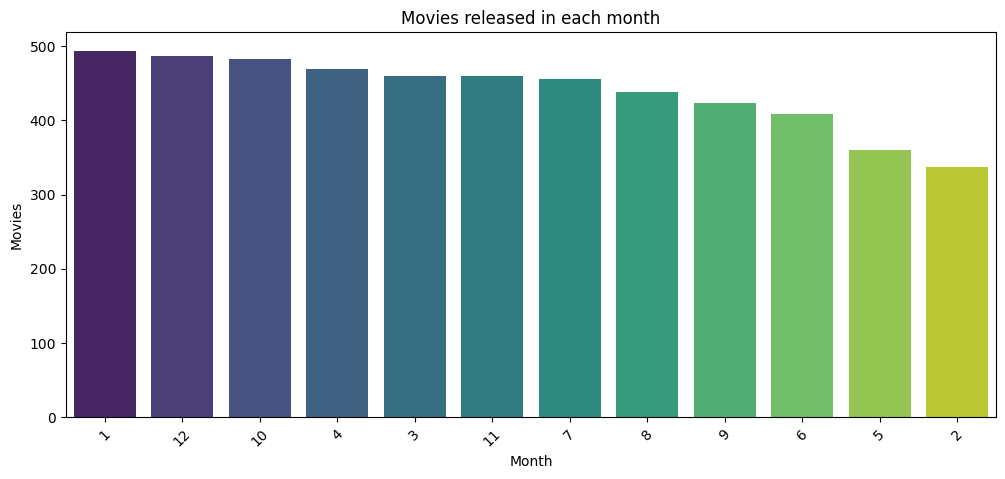

<Figure size 640x480 with 0 Axes>

In [74]:
month = netflix_movie.groupby(['month_added'])['show_id'].nunique()

month_df = pd.DataFrame({'Month': month.index, 'count': month})
month_df = month_df.sort_values(by='count', ascending=False)
custom_order = month_df['Month'].tolist()

plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='count', data=month_df, palette='viridis', order=custom_order)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Movies')
plt.title('Movies released in each month')
plt.show()
plt.tight_layout()

In [75]:
netflix_tv['weekofyear'] = netflix_tv['date_added'].dt.isocalendar().week
netflix_movie['weekofyear'] = netflix_movie['date_added'].dt.isocalendar().week

In [76]:
netflix_tv.groupby(['weekofyear'])['show_id'].nunique().sort_values(ascending=False)

weekofyear
27    68
31    62
44    60
5     59
50    58
13    57
26    53
35    53
40    53
24    52
48    48
37    45
18    45
46    44
52    43
22    43
20    41
51    41
1     41
15    40
39    38
32    37
53    36
49    35
7     34
42    34
33    34
23    33
36    33
12    32
38    32
14    32
8     31
9     31
29    30
16    30
21    30
11    28
30    27
45    26
47    26
2     25
25    25
4     25
28    24
17    24
34    23
41    23
43    23
3     23
10    22
6     21
19    21
Name: show_id, dtype: int64

<ipython-input-77-f4f15c31fddd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='count', data=week_df, palette='viridis')


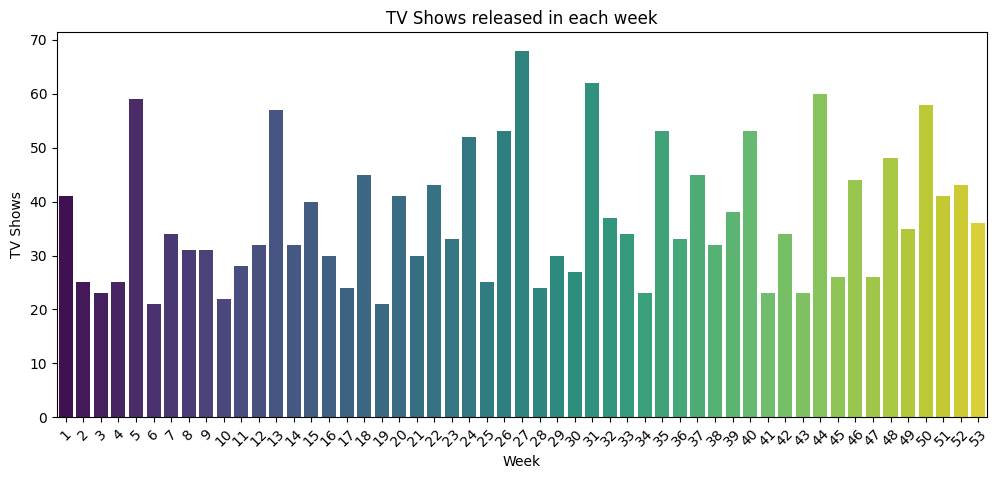

<Figure size 640x480 with 0 Axes>

In [77]:
week = netflix_tv.groupby(['weekofyear'])['show_id'].nunique()

week_df = pd.DataFrame({'week': week.index, 'count': week})

plt.figure(figsize=(12, 5))
sns.barplot(x='week', y='count', data=week_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('TV Shows')
plt.title('TV Shows released in each week')
plt.show()
plt.tight_layout()

<ipython-input-78-b23a859da5df>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='count', data=week_top10_df, palette='viridis', order=custom_order)


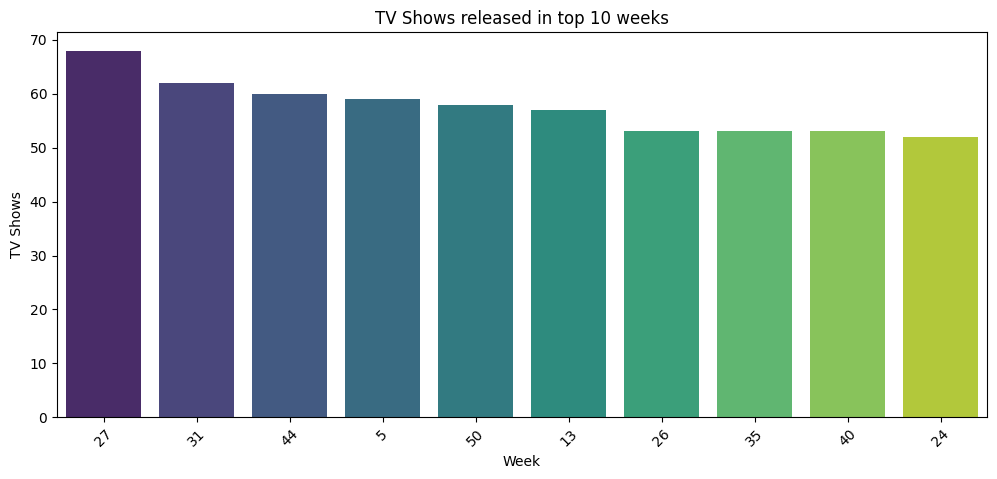

<Figure size 640x480 with 0 Axes>

In [78]:
week_top10 = netflix_tv.groupby(['weekofyear'])['show_id'].nunique().nlargest(10)

week_top10_df = pd.DataFrame({'week': week_top10.index, 'count': week_top10})
week_top10_df = week_top10_df.sort_values(by='count', ascending=False)
custom_order = week_top10_df['week'].tolist()

plt.figure(figsize=(12, 5))
sns.barplot(x='week', y='count', data=week_top10_df, palette='viridis', order=custom_order)
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('TV Shows')
plt.title('TV Shows released in top 10 weeks')
plt.show()
plt.tight_layout()

In [79]:
netflix_movie.groupby(['weekofyear'])['show_id'].nunique().sort_values(ascending=False)

weekofyear
1     291
44    221
40    195
9     185
35    167
26    167
31    163
18    151
13    148
27    129
22    127
48    123
5     110
14    108
50    102
11    101
16    101
23    100
30     98
10     98
7      94
37     94
39     91
17     90
33     87
49     86
15     86
25     83
47     82
34     81
43     79
51     78
36     77
41     77
46     75
3      74
42     71
2      70
52     69
38     68
24     67
28     66
20     65
29     64
8      63
21     61
19     60
6      59
53     58
45     57
32     56
12     54
4      50
Name: show_id, dtype: int64

<ipython-input-132-4f0d29176636>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='count', data=week_df, palette='viridis')


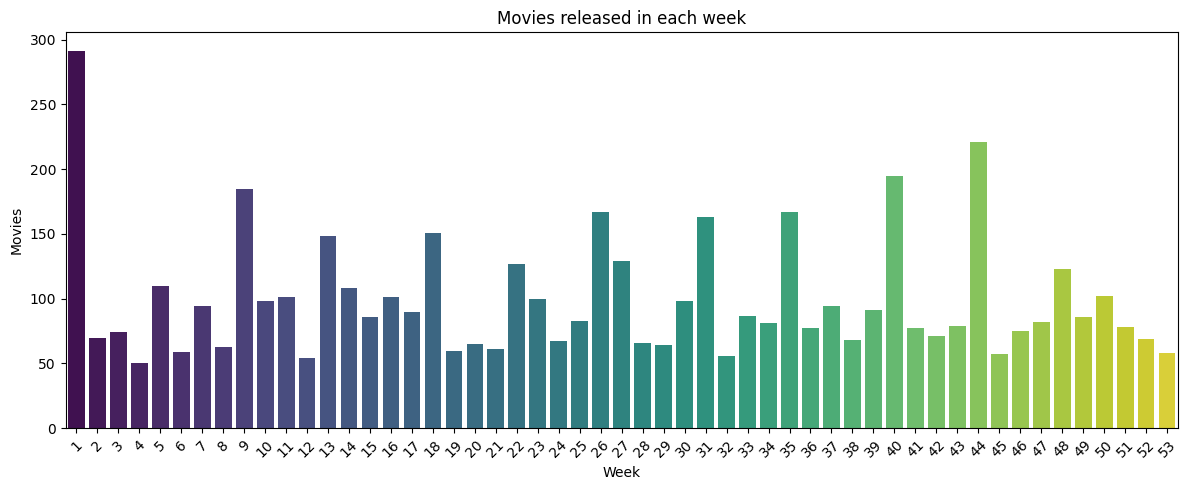

In [132]:
week = netflix_movie.groupby(['weekofyear'])['show_id'].nunique()

week_df = pd.DataFrame({'week': week.index, 'count': week})

plt.figure(figsize=(12, 5))
sns.barplot(x='week', y='count', data=week_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Movies')
plt.title('Movies released in each week')
plt.tight_layout()
plt.show()

<ipython-input-131-b6d139468fcd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='count', data=week_top10_df, palette='viridis', order=custom_order)


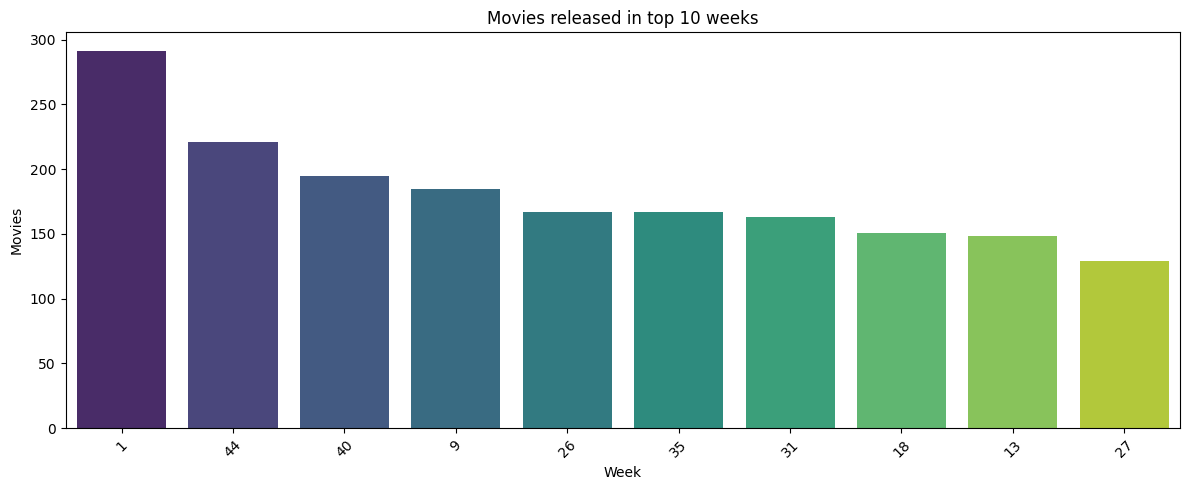

In [131]:
week_top10 = netflix_movie.groupby(['weekofyear'])['show_id'].nunique().nlargest(10)

week_top10_df = pd.DataFrame({'week': week_top10.index, 'count': week_top10})
week_top10_df = week_top10_df.sort_values(by='count', ascending=False)
custom_order = week_top10_df['week'].tolist()

plt.figure(figsize=(12, 5))
sns.barplot(x='week', y='count', data=week_top10_df, palette='viridis', order=custom_order)
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Movies')
plt.title('Movies released in top 10 weeks')
plt.tight_layout()
plt.show()

In [82]:
netflix_tv['dayofweek'] = netflix_tv['date_added'].dt.day_name()
netflix_movie['dayofweek'] = netflix_movie['date_added'].dt.day_name()

In [83]:
netflix_tv.groupby(['dayofweek'])['show_id'].nunique()

dayofweek
Friday       692
Monday       159
Saturday     206
Sunday       141
Thursday     260
Tuesday      272
Wednesday    224
Name: show_id, dtype: int64

<ipython-input-130-e38335af5b51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='count', data=week_day_df, palette='viridis')


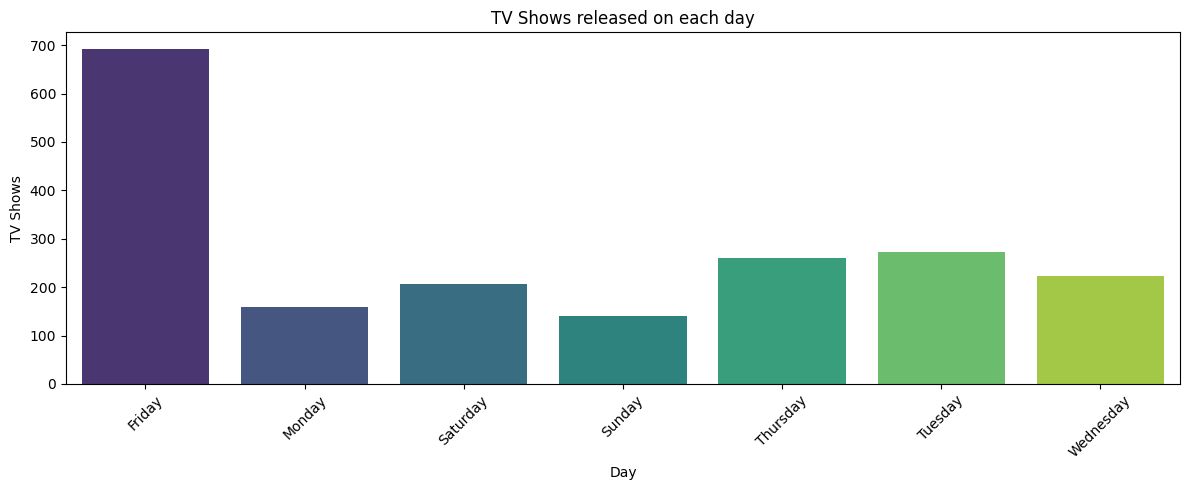

In [130]:
week_day = netflix_tv.groupby(['dayofweek'])['show_id'].nunique()

week_day_df = pd.DataFrame({'week': week_day.index, 'count': week_day})

plt.figure(figsize=(12, 5))
sns.barplot(x='week', y='count', data=week_day_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('TV Shows')
plt.title('TV Shows released on each day')
plt.tight_layout()
plt.show()

In [85]:
netflix_movie.groupby(['dayofweek'])['show_id'].nunique()

dayofweek
Friday       1308
Monday        533
Saturday      495
Sunday        514
Thursday      924
Tuesday       734
Wednesday     769
Name: show_id, dtype: int64

<ipython-input-129-9b5ecf7d097d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='count', data=week_day_df, palette='viridis')


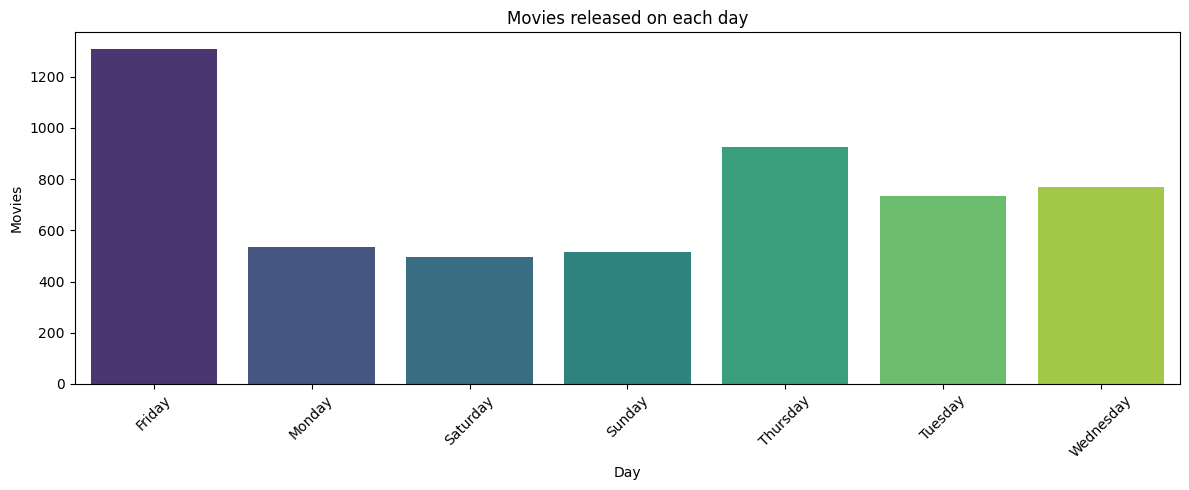

In [129]:
week_day = netflix_movie.groupby(['dayofweek'])['show_id'].nunique()

week_day_df = pd.DataFrame({'week': week_day.index, 'count': week_day})

plt.figure(figsize=(12, 5))
sns.barplot(x='week', y='count', data=week_day_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Movies')
plt.title('Movies released on each day')
plt.tight_layout()
plt.show()

In [87]:
netflix_tv.groupby(['day_added'])['show_id'].nunique()

day_added
1     394
2      57
3      40
4      40
5      50
6      57
7      39
8      47
9      38
10     63
11     32
12     41
13     40
14     53
15    182
16     55
17     54
18     40
19     60
20     52
21     47
22     61
23     44
24     42
25     38
26     42
27     45
28     41
29     29
30     64
31     67
Name: show_id, dtype: int64

<ipython-input-128-e19682555804>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis')


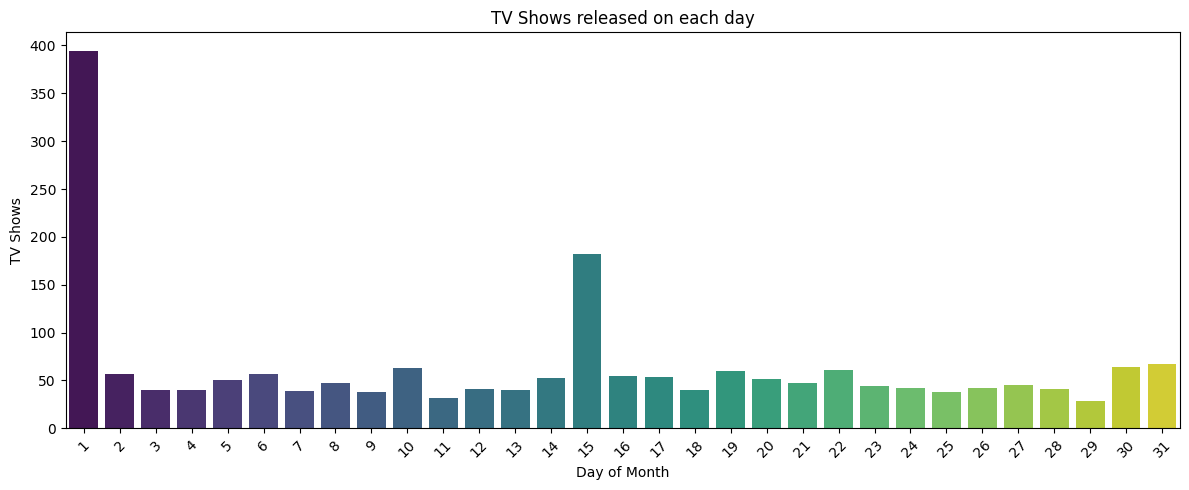

In [128]:
day_of_month = netflix_tv.groupby(['day_added'])['show_id'].nunique()

day_of_month_df = pd.DataFrame({'day': day_of_month.index, 'count': day_of_month})

plt.figure(figsize=(12, 5))
sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Day of Month')
plt.ylabel('TV Shows')
plt.title('TV Shows released on each day')
plt.tight_layout()
plt.show()

<ipython-input-127-36dcfff671fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis', order=custom_order)


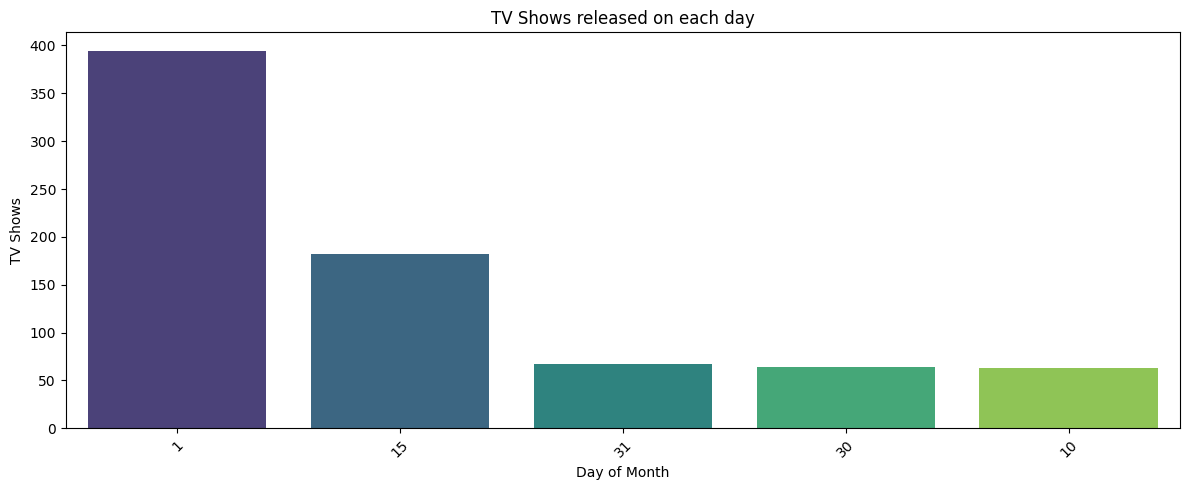

In [127]:
day_of_month = netflix_tv.groupby(['day_added'])['show_id'].nunique().nlargest(5)

day_of_month_df = pd.DataFrame({'day': day_of_month.index, 'count': day_of_month})
day_of_month_df = day_of_month_df.sort_values(by='count', ascending=False)
custom_order = day_of_month_df['day'].tolist()

plt.figure(figsize=(12, 5))
sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis', order=custom_order)
plt.xticks(rotation=45)
plt.xlabel('Day of Month')
plt.ylabel('TV Shows')
plt.title('TV Shows released on each day')
plt.tight_layout()
plt.show()

In [90]:
netflix_movie.groupby(['day_added'])['show_id'].nunique()

day_added
1     1526
2      210
3       86
4      102
5      153
6      123
7      100
8      109
9       77
10     116
11      82
12     106
13      97
14     105
15     394
16     189
17      94
18     112
19     140
20     141
21     112
22     113
23      98
24      85
25     117
26     127
27     116
28     114
29      76
30      98
31     159
Name: show_id, dtype: int64

<ipython-input-126-dcbf4df104d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis')


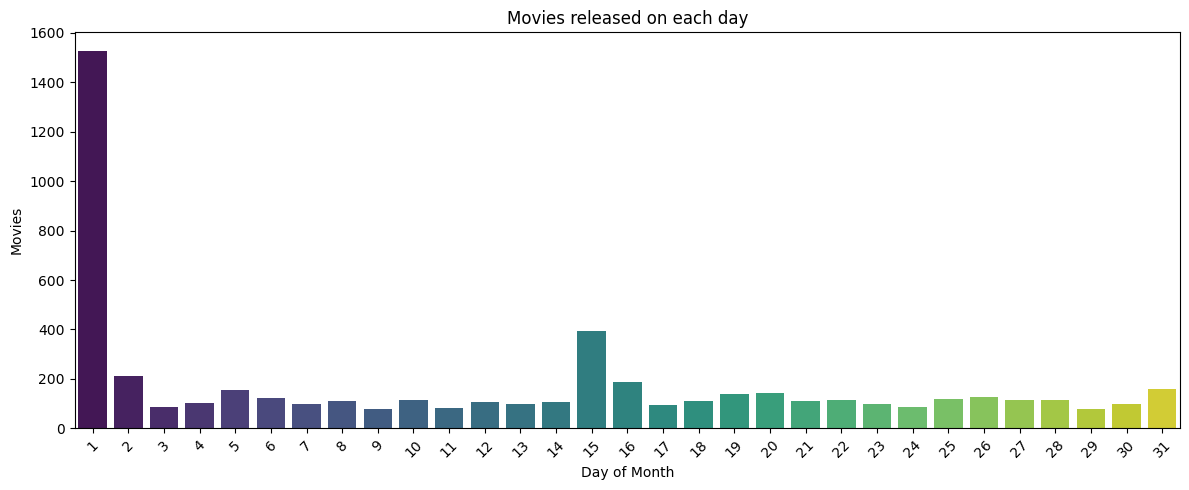

In [126]:
day_of_month = netflix_movie.groupby(['day_added'])['show_id'].nunique()

day_of_month_df = pd.DataFrame({'day': day_of_month.index, 'count': day_of_month})

plt.figure(figsize=(12, 5))
sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Day of Month')
plt.ylabel('Movies')
plt.title('Movies released on each day')
plt.tight_layout()
plt.show()

<ipython-input-125-29886bd3d7a5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis', order=custom_order)


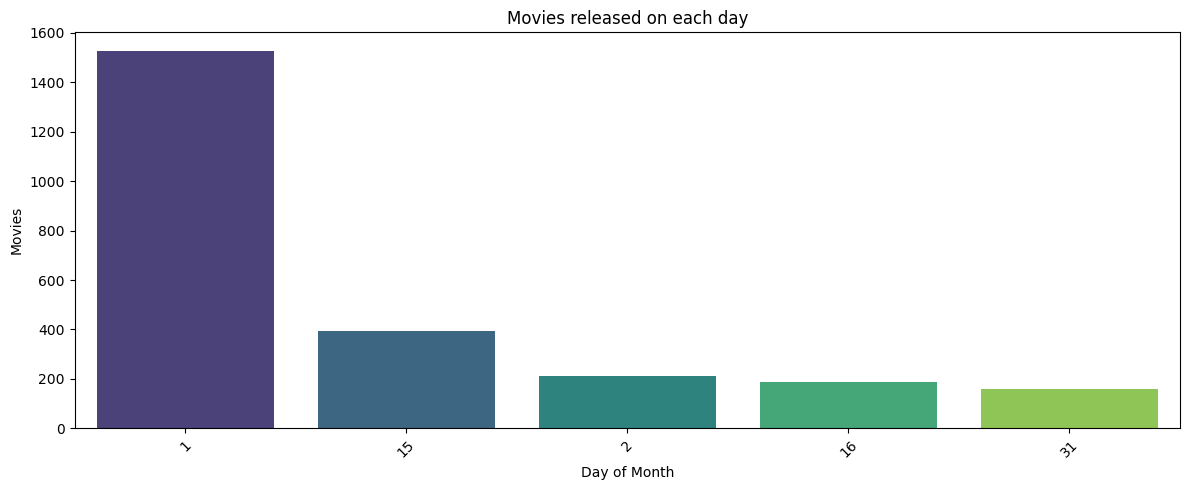

In [125]:
day_of_month = netflix_movie.groupby(['day_added'])['show_id'].nunique().nlargest(5)

day_of_month_df = pd.DataFrame({'day': day_of_month.index, 'count': day_of_month})
day_of_month_df = day_of_month_df.sort_values(by='count', ascending=False)
custom_order = day_of_month_df['day'].tolist()

plt.figure(figsize=(12, 5))
sns.barplot(x='day', y='count', data=day_of_month_df, palette='viridis', order=custom_order)
plt.xticks(rotation=45)
plt.xlabel('Day of Month')
plt.ylabel('Movies')
plt.title('Movies released on each day')
plt.tight_layout()
plt.show()

# Top 10 Actors and Directors

In [93]:
netflix_tv.groupby(['director'])['show_id'].nunique().sort_values(ascending=False)

director
Rob Seidenglanz      743
Noam Murro           215
Yasuhiro Irie        183
Shin Won-ho          158
Stefan Brogren       112
                    ... 
James Hawes            1
Jani Lachauer          1
Jay Chandrasekhar      1
Jeon Go-woon           1
Ziad Doueiri           1
Name: show_id, Length: 191, dtype: int64

<ipython-input-124-01a9a75ba62e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director', y='count', data=top_10_directors_df, palette='viridis')


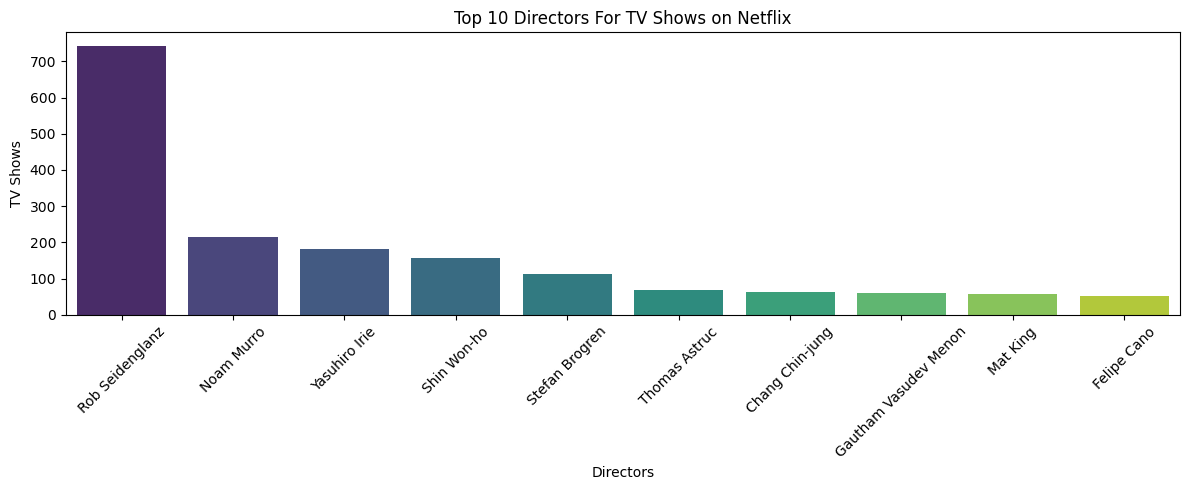

In [124]:
top_10_directors = netflix_tv.groupby(['director'])['show_id'].nunique().nlargest(10)

top_10_directors_df = pd.DataFrame({'director': top_10_directors.index, 'count': top_10_directors})

plt.figure(figsize=(12, 5))
sns.barplot(x='director', y='count', data=top_10_directors_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Shows')
plt.title('Top 10 Directors For TV Shows on Netflix')
plt.tight_layout()
plt.show()

In [95]:
netflix_movie.groupby(['director'])['show_id'].nunique().sort_values(ascending=False)

director
Martin Scorsese        60
Jan Suter              21
RaÃºl Campos           19
David Dhawan           19
Sarah Smith            15
                       ..
Joshua Caldwell         1
Joshua Marston          1
Joshua Tickell          1
Joshua Z. Weinstein     1
Kevin Wotton            1
Name: show_id, Length: 4167, dtype: int64

<ipython-input-123-ee7940be11fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director', y='count', data=top_10_directors_df, palette='viridis')


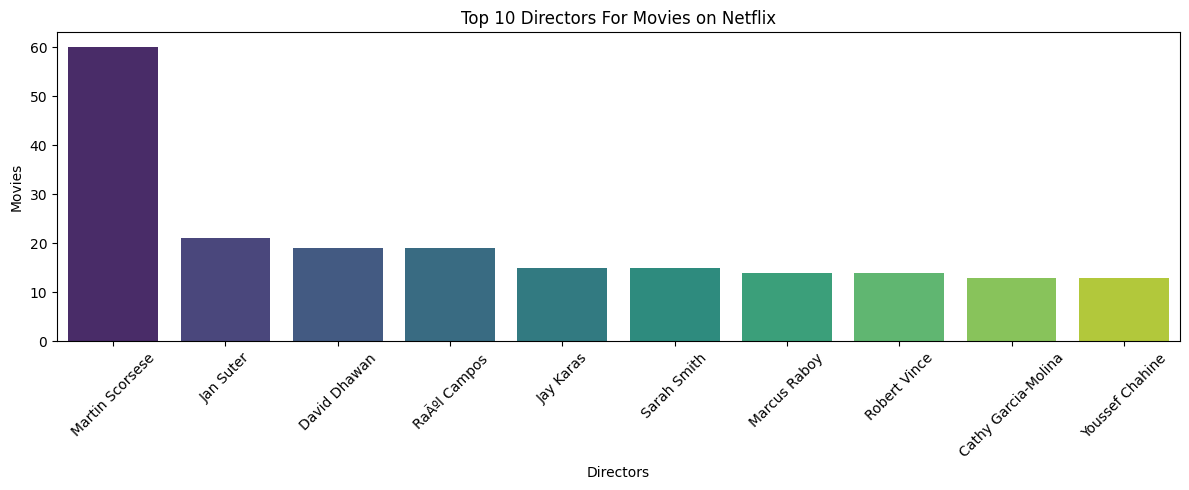

In [123]:
top_10_directors = netflix_movie.groupby(['director'])['show_id'].nunique().nlargest(10)

top_10_directors_df = pd.DataFrame({'director': top_10_directors.index, 'count': top_10_directors})

plt.figure(figsize=(12, 5))
sns.barplot(x='director', y='count', data=top_10_directors_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movies')
plt.title('Top 10 Directors For Movies on Netflix')
plt.tight_layout()
plt.show()

In [97]:
netflix_tv.groupby(['cast'])['show_id'].nunique().sort_values(ascending=False)

cast
Takahiro Sakurai        22
Yuki Kaji               18
Daisuke Ono             17
Junichi Suwabe          16
Yuichi Nakamura         15
                        ..
Isabel Schosnig          1
Isabella BarragÃ¡n       1
Isabella Castillo        1
Isabella Crovetti        1
ÅžÃ¼krÃ¼ Ã–zyÄ±ldÄ±z     1
Name: show_id, Length: 12965, dtype: int64

<ipython-input-122-55387e8e0e25>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actor', y='count', data=top_10_actors_df, palette='viridis')


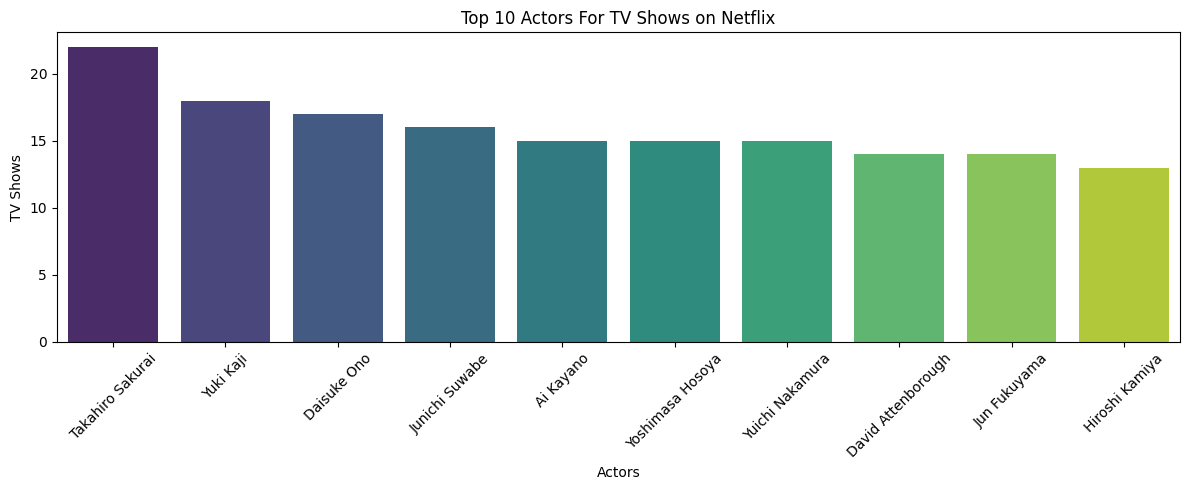

In [122]:
top_10_actors = netflix_tv.groupby(['cast'])['show_id'].nunique().nlargest(10)

top_10_actors_df = pd.DataFrame({'actor': top_10_actors.index, 'count': top_10_actors})

plt.figure(figsize=(12, 5))
sns.barplot(x='actor', y='count', data=top_10_actors_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Shows')
plt.title('Top 10 Actors For TV Shows on Netflix')
plt.tight_layout()
plt.show()

In [99]:
netflix_movie.groupby(['cast'])['show_id'].nunique().sort_values(ascending=False)

cast
Anupam Kher               42
Shah Rukh Khan            34
Naseeruddin Shah          31
Om Puri                   30
Akshay Kumar              30
                          ..
Jackie Collins             1
Jackie Christie            1
Jackie Appiah              1
Jack Tomich                1
á¹¢á»páº¹Ì DÃ¬rÃ­sÃ¹     1
Name: show_id, Length: 24814, dtype: int64

<ipython-input-121-3cf26c276759>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actor', y='count', data=top_10_actors_df, palette='viridis')


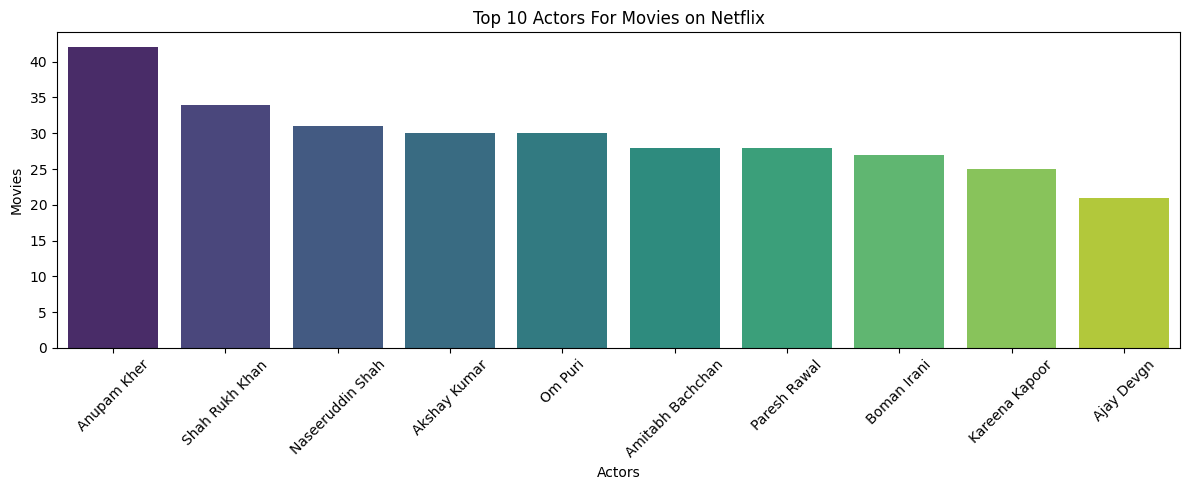

In [121]:
top_10_actors = netflix_movie.groupby(['cast'])['show_id'].nunique().nlargest(10)

top_10_actors_df = pd.DataFrame({'actor': top_10_actors.index, 'count': top_10_actors})

plt.figure(figsize=(12, 5))
sns.barplot(x='actor', y='count', data=top_10_actors_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movies')
plt.title('Top 10 Actors For Movies on Netflix')
plt.tight_layout()
plt.show()

# Most Popular Genre

In [101]:
netflix_nested_tv = Netflix[Netflix['type'] == 'TV Show']
netflix_nested_tv = netflix_nested_tv.reset_index(drop = True)
netflix_nested_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
3,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
4,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...


In [102]:
from wordcloud import WordCloud
genre_tv = ' '.join(netflix_nested_tv['listed_in'].tolist())
wordcloud_tv = WordCloud(background_color='black', max_font_size=50).generate(genre_tv)

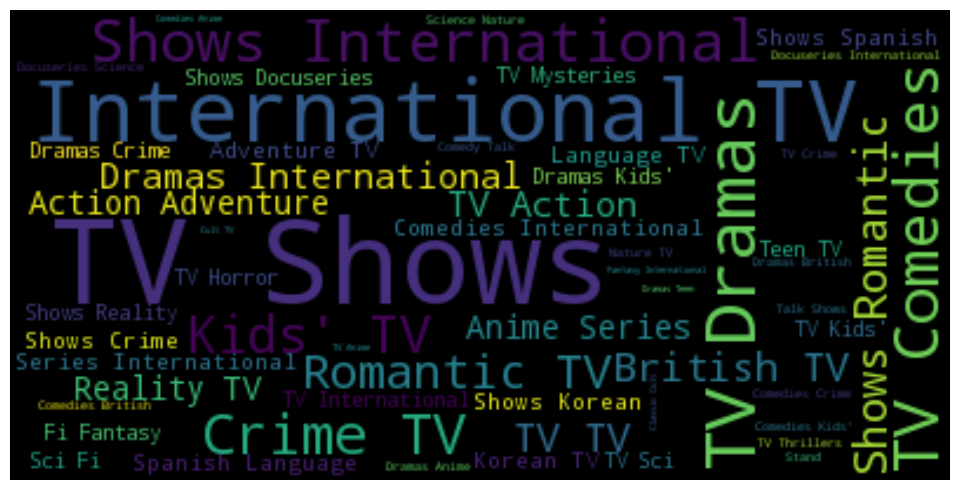

In [103]:
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud_tv, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [104]:
netflix_nested_movie = Netflix[Netflix['type'] == 'Movie']
netflix_nested_movie = netflix_nested_movie.reset_index(drop = True)
netflix_nested_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
3,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [105]:
genre_movie = ' '.join(netflix_nested_movie['listed_in'].tolist())
wordcloud_movie = WordCloud(background_color='black', max_font_size=50).generate(genre_movie)

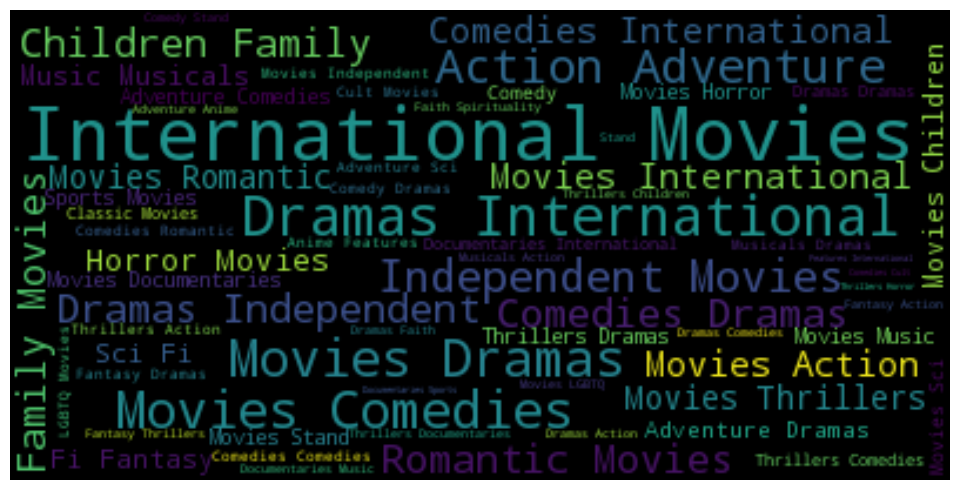

In [106]:
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud_movie, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [107]:
netflix_tv.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)

listed_in
International TV Shows          991
TV Dramas                       612
TV Comedies                     464
Crime TV Shows                  344
Kids' TV                        339
Romantic TV Shows               285
British TV Shows                200
Docuseries                      162
TV Action & Adventure           151
Anime Series                    150
Reality TV                      141
Spanish-Language TV Shows       136
Korean TV Shows                 133
TV Mysteries                     82
TV Sci-Fi & Fantasy              75
TV Horror                        66
Teen TV Shows                    63
Science & Nature TV              52
TV Thrillers                     47
Stand-Up Comedy & Talk Shows     41
Classic & Cult TV                25
TV Shows                          5
Name: show_id, dtype: int64

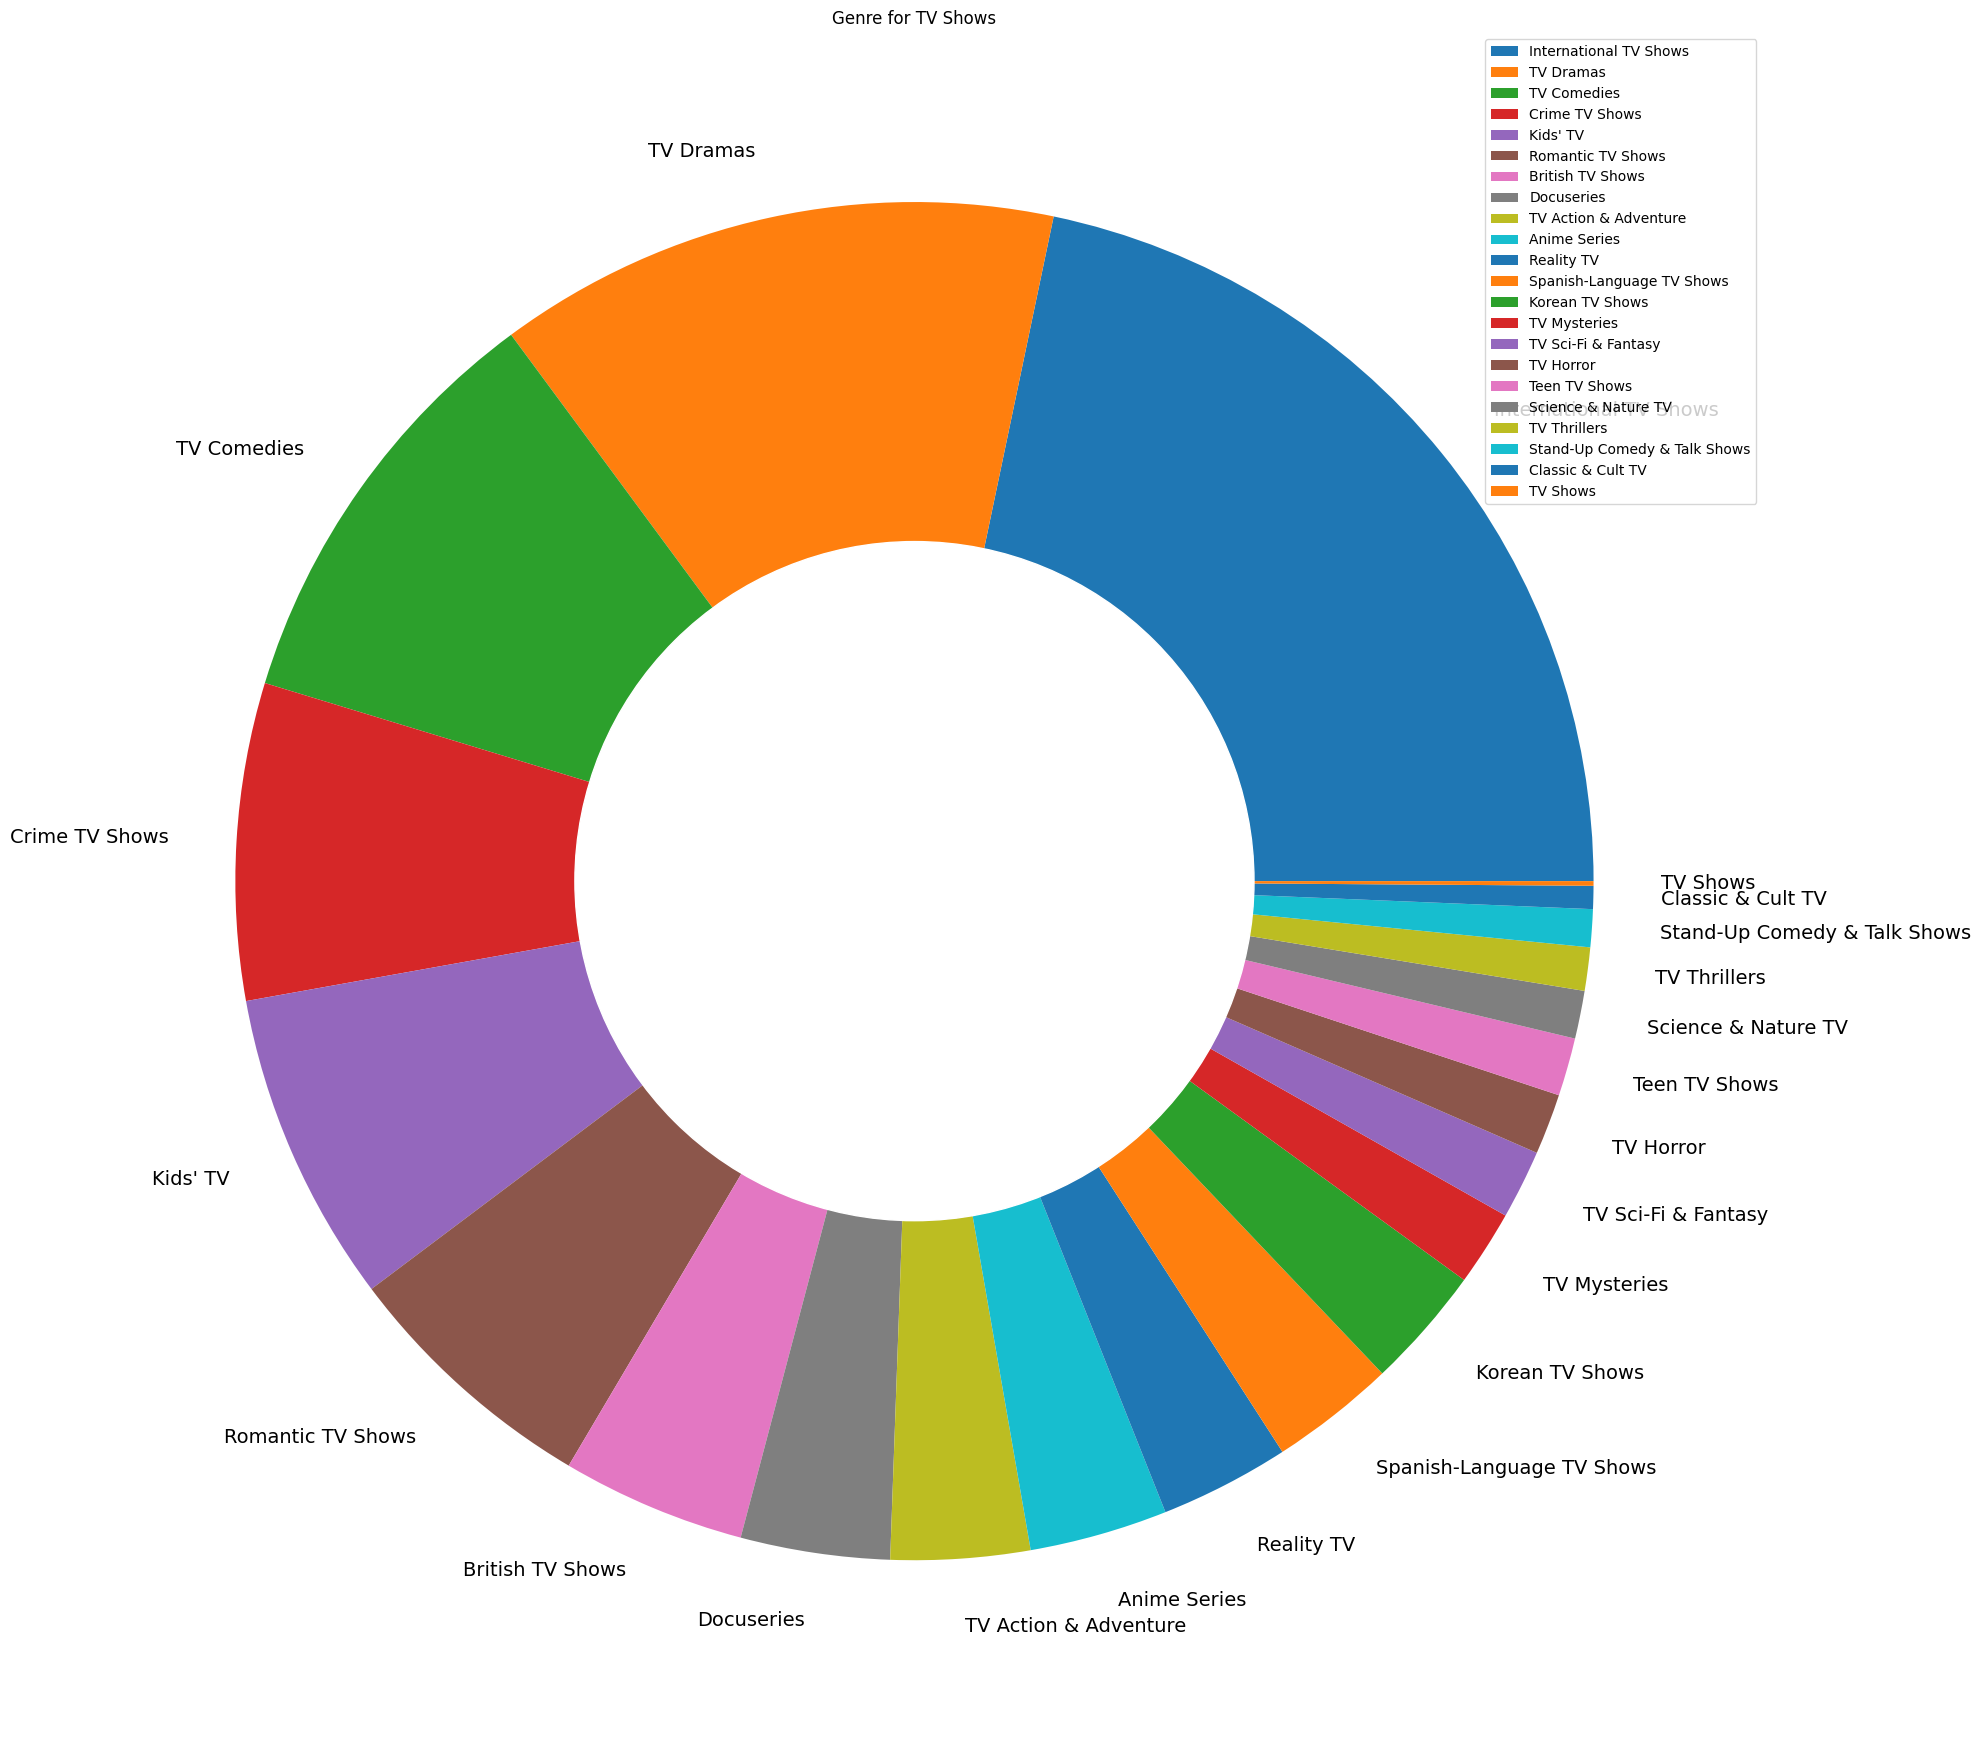

In [120]:
genre_tv = netflix_tv.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)
labels = genre_tv.index

plt.figure(figsize=(20, 20))
plt.pie(genre_tv,labels=labels,textprops={'fontsize': 14})
# plt.pie(genre_tv,labels=labels)
plt.gca().set_aspect('equal')
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.gca().add_artist(my_circle)
plt.legend()
plt.title('Genre for TV Shows')
plt.tight_layout()
plt.show()

In [109]:
netflix_movie.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)

listed_in
International Movies        2392
Dramas                      2309
Comedies                    1574
Action & Adventure           811
Independent Movies           742
Romantic Movies              583
Thrillers                    549
Children & Family Movies     521
Documentaries                410
Horror Movies                338
Stand-Up Comedy              310
Music & Musicals             299
Sci-Fi & Fantasy             239
Sports Movies                157
Classic Movies               108
LGBTQ Movies                  82
Cult Movies                   69
Anime Features                61
Faith & Spirituality          58
Movies                        30
Name: show_id, dtype: int64

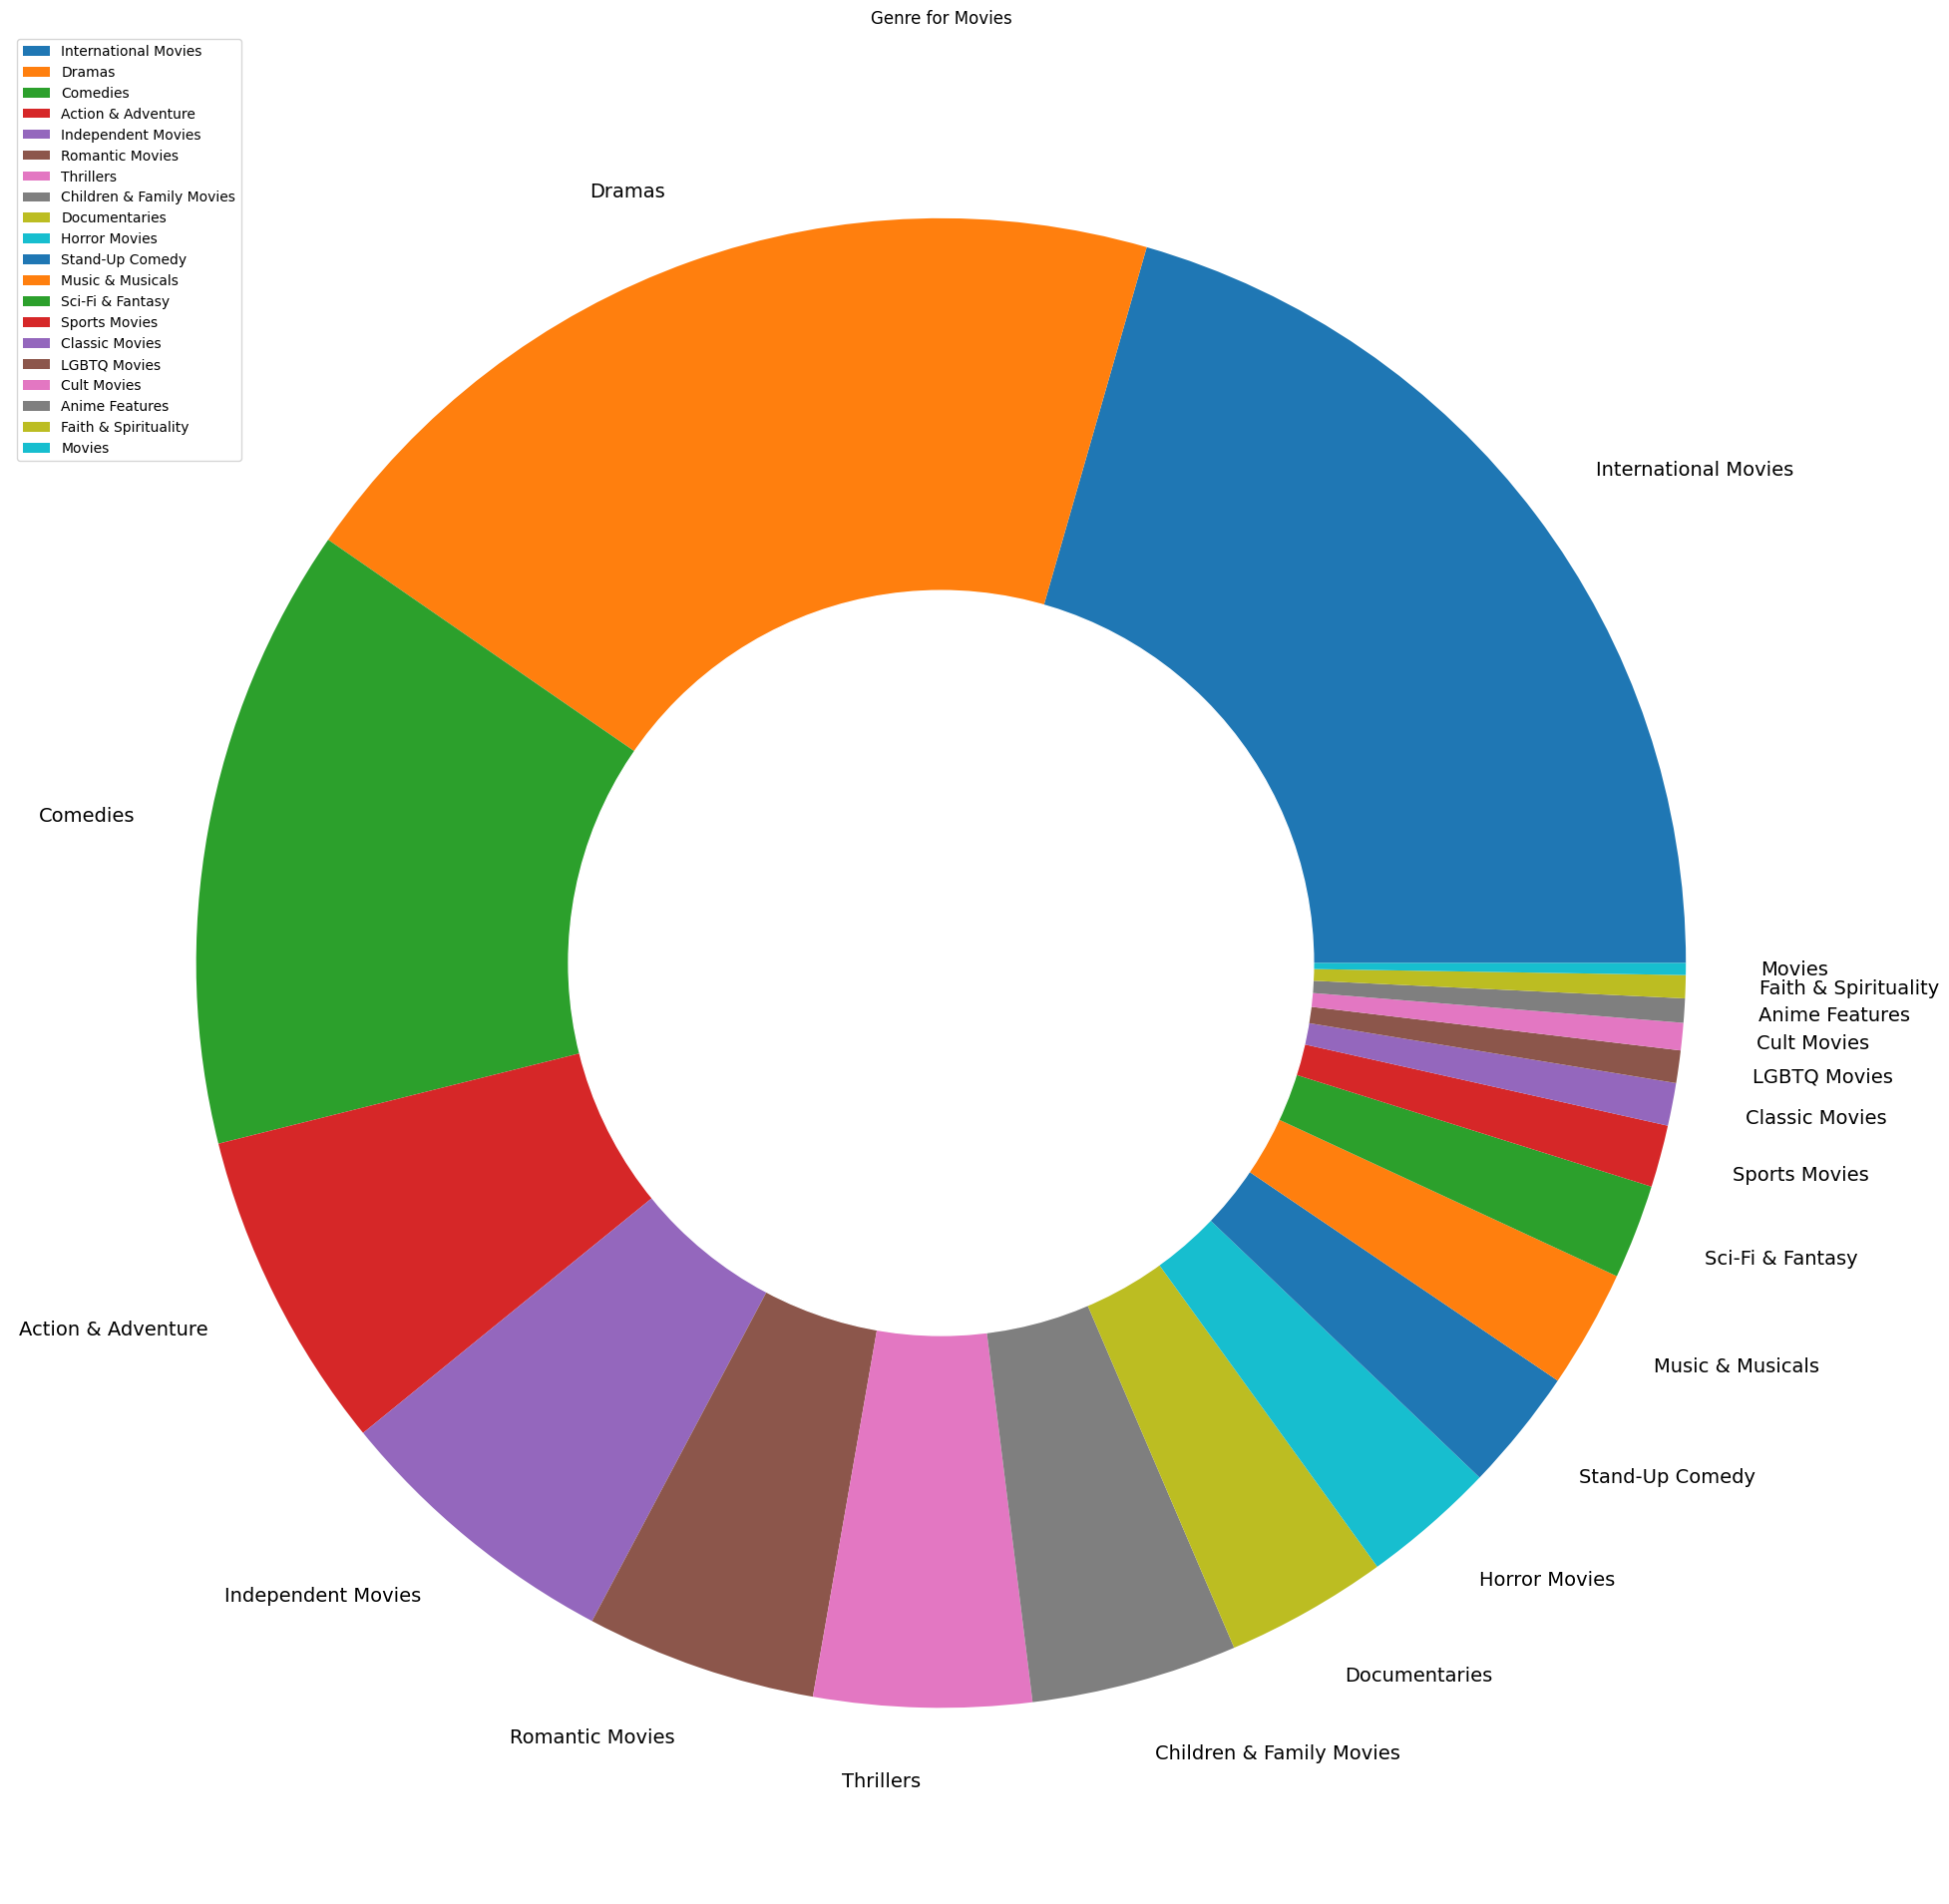

In [119]:
genre_movie = netflix_movie.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)
labels = genre_movie.index

plt.figure(figsize=(20, 20))
plt.pie(genre_movie,labels=labels,textprops={'fontsize': 14})
# plt.pie(genre_tv,labels=labels)
plt.gca().set_aspect('equal')
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.gca().add_artist(my_circle)
plt.legend()
plt.title('Genre for Movies')
plt.tight_layout()
plt.show()

#Difference in Release Year and the Year at which show/movie is Added

In [111]:
netflix_tv.groupby(['Year_difference'])['show_id'].nunique().sort_values(ascending=False)

Year_difference
 0     977
 1     289
 2     158
 3     109
 4      71
 5      56
 6      56
 7      39
 8      33
 9      28
 10     15
 11     12
 13     12
 14     11
 15     10
-1      10
 12      9
 18      7
 17      6
 16      6
 21      5
 19      4
 27      4
 20      3
 24      3
 28      2
 22      2
 25      2
 34      1
 38      1
 41      1
 46      1
 44      1
 50      1
 37      1
-3       1
 33      1
 31      1
 29      1
 26      1
 23      1
-2       1
 54      1
Name: show_id, dtype: int64

<ipython-input-118-3f57d552b17e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_diff', y='count', data=top_10_year_diff_df, palette='viridis')


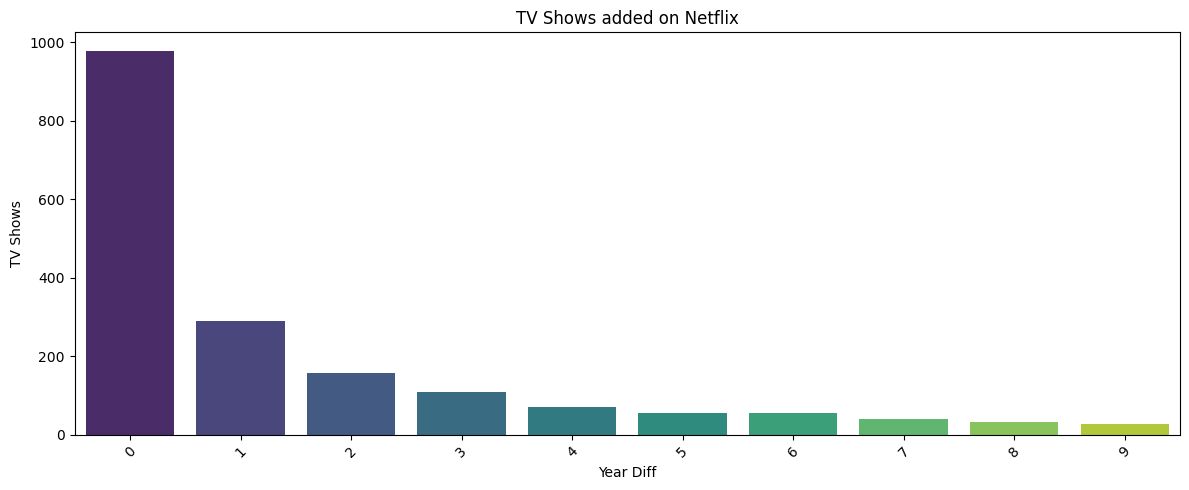

In [118]:
top_10_year_diff = netflix_tv.groupby(['Year_difference'])['show_id'].nunique().nlargest(10)
top_10_year_diff_df = pd.DataFrame({'year_diff': top_10_year_diff.index, 'count': top_10_year_diff})

plt.figure(figsize=(12, 5))
sns.barplot(x='year_diff', y='count', data=top_10_year_diff_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Year Diff')
plt.ylabel('TV Shows')
plt.title('TV Shows added on Netflix')
plt.tight_layout()
plt.show()

In [113]:
netflix_movie.groupby(['Year_difference'])['show_id'].nunique().sort_values(ascending=False)

Year_difference
0     1468
1      977
2      425
3      309
4      241
      ... 
70       1
71       1
72       1
73       1
75       1
Name: show_id, Length: 70, dtype: int64

<ipython-input-117-a51322b526cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_diff', y='count', data=top_10_year_diff_df, palette='viridis')


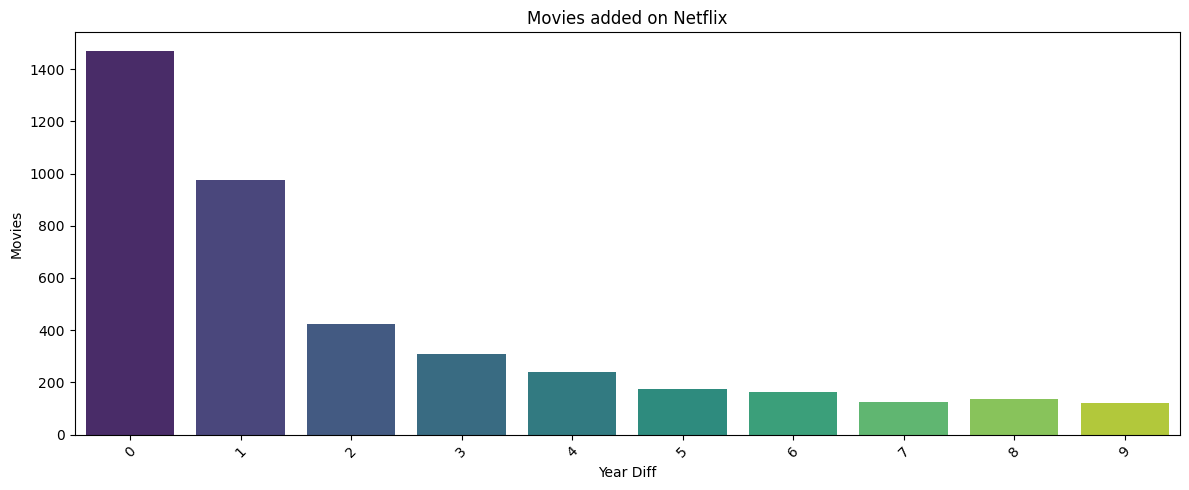

In [117]:
top_10_year_diff = netflix_movie.groupby(['Year_difference'])['show_id'].nunique().nlargest(10)

top_10_year_diff_df = pd.DataFrame({'year_diff': top_10_year_diff.index, 'count': top_10_year_diff})

plt.figure(figsize=(12, 5))
sns.barplot(x='year_diff', y='count', data=top_10_year_diff_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Year Diff')
plt.ylabel('Movies')
plt.title('Movies added on Netflix')
plt.tight_layout()
plt.show()

# Insights for Netflix Data
### 1) TV-MA has highest count for movies and TV-Shows out of all the ratings
### 2) highest number of movies were released in 2018 where as highest TV-Shows were released in 2020
### 3) In 2021 Number of TV-shows is greater than number of movies
### 4) United States have highest no. of movies as well as TV-Shows among all the countries  
### 5) The Most duration for movies is 94 mins where as most TV-Shows run only for 1 season
### 6) While comparing to the year of release and the year of added to Netflix Maximum TV-Shows and Maximum movies are added on the same year that they released
### 7) Some TV-Shows or Movies were added to Netflix before their release
### 8) Highest number of movies and TV-shows were added on 1st day of the month
### 9) Highest number of movies were added to Netflix in January and highest number of TV-shows were added to Netflix in December
### 10) Highest number of movies and TV-shows were added to Netflix on Friday
### 11) Top Director for TV-Show is 'Rob Seidenglanz' and top Director for Movies is 'Martin Scorsese'
### 12) Top Actor for TV_Shows is 'Takahiro Sakurai' and top Actor for Movies is 'Anupam Kher'
### 13) Most added genre for TV-Shows is 'International TV shows' and most added genre for movies is 'International Movies'




# Here are some recommendations that could help Netflix in deciding which types of TV-shows and movies to produce and how they can grow their business

### 1) Focus on TV-MA Content: Given that TV-MA content has the highest count for both movies and TV shows, it's clear that there is a demand for mature content. Netflix should continue to produce and acquire content in this category, catering to the preferences of mature audiences.

### 2) Emphasize Releases in 2018 and 2020: Since 2018 saw the highest number of movie releases and 2020 had the highest number of TV show releases, Netflix should analyze the success factors of content from these years. They can learn from those successes and replicate them in future productions.

### 3) Adapt to Current Trends: Considering that in 2021, the number of TV shows exceeded the number of movies, Netflix should continue to monitor trends and adapt to the changing preferences of their audience. This might involve investing more in TV show production.

### 4) Prioritize the U.S. Market: Given that the United States has the highest number of both movies and TV shows, Netflix should continue to invest in content that resonates with American viewers. This market is crucial for their business.

### 5) Optimize Content Duration: Since the most common movie duration is 94 minutes, and TV shows often have one season, Netflix should focus on creating content that fits these preferences while ensuring high-quality storytelling within these constraints.

### 6) Sync Release and Addition Dates: Netflix should aim to release and add content on the same year, as this seems to be a popular pattern among viewers. This reduces the wait time for subscribers, increasing satisfaction.

### 7) Strategic Release Days: As most content is added on the 1st day of the month and on Fridays, Netflix should strategically plan major content releases on these days to attract more viewers.

### 8) Explore International Content: Given that "International TV shows" and "International Movies" are the most added genres, Netflix should continue to invest in content from different countries and languages. This can help them attract a global audience and diversify their content library.